# <p style="text-align:center;">**E-COMMERCE CUSTOMER CHURN**</p>
### <p style="text-align:center;">**Capstone Modul 3**</p>
---

`Created by : Reska Julianti`

---

# BUSINESS PROBLEM UNDERSTANDING

### **Context**

Dalam era digital saat ini, industri e-commerce mengalami pertumbuhan yang pesat di seluruh dunia. Dengan semakin banyaknya platform e-commerce yang bermunculan, persaingan di pasar menjadi semakin ketat. Salah satu tantangan utama yang dihadapi oleh perusahaan e-commerce adalah customer churn,  Customer churn merujuk pada pelanggan yang berpotensi meninggalkan penyedia layanan dalam periode tertentu. Tujuan utama analisis churn adalah memprediksi pelanggan yang kemungkinan berpindah, mengidentifikasi penyebabnya, dan mengambil langkah untuk memperbaiki masalah. Pendekatan ini membantu memenuhi kebutuhan pelanggan agar tetap menggunakan layanan yang disediakan Wagh et al. (2024). 

### **Problem Statement**
Salah satu faktor utama yang berkontribusi terhadap churn adalah ketidakakuratan dalam penawaran promosi yang tidak sesuai dengan kebutuhan dan preferensi pelanggan. Promosi yang tidak relevan atau tidak menarik dapat menyebabkan pelanggan merasa tidak dihargai dan akhirnya beralih ke pesaing. Oleh karena itu, perusahaan e-commerce perlu mengidentifikasi pelanggan yang berisiko churn dan merancang promosi yang lebih tepat sasaran, sehingga dapat meningkatkan retensi pelanggan dan mengurangi churn yang disebabkan oleh faktor promosi yang tidak tepat.



### **Goals**
Tujuan dari analisis ini adalah untuk mengembangkan model prediksi berbasis machine learning yang dapat mengidentifikasi pelanggan berisiko churn, sehingga perusahaan e-commerce dapat menargetkan promosi lebih efisien kepada pelanggan yang tepat. Dengan memfokuskan penawaran pada pelanggan dengan potensi churn tinggi, perusahaan dapat mengurangi pemborosan anggaran dan kerugian pendapatan. Selain itu, dengan memahami faktor-faktor yang mempengaruhi churn, perusahaan dapat merancang promosi yang lebih relevan, meningkatkan loyalitas pelanggan, dan memperkuat hubungan dengan pelanggan yang ada. Tujuan ini diharapkan dapat meningkatkan retensi, mengurangi biaya akuisisi pelanggan baru, serta memperkuat daya saing perusahaan di pasar e-commerce.

### **Analytic Approach**
Pendekatan analitik ini dimulai dengan menganalisis data pelanggan untuk mengidentifikasi pola yang membedakan pelanggan yang berisiko churn dengan yang tidak. Berdasarkan analisis tersebut, model machine learning klasifikasi akan dibangun untuk memprediksi kemungkinan churn, yang memungkinkan perusahaan untuk mengarahkan strategi retensi secara lebih efisien dan tepat sasaran.


### **Metric Evaluation**

Dalam melakukan prediksi, terdapat dua jenis kesalahan yang mungkin terjadi:
1. **Kesalahan Tipe 1 (False Positive)**
    - Dampaknya: Perusahaan akan mengalami kerugian karena mengeluarkan biaya promosi untuk pelanggan yang tidak tepat sasaran.
3. **Kesalahan Tipe 2 (False Negative)**
    - Dampaknya: Perusahaan akan merugi karena pelanggan yang seharusnya diberi perhatian justru berhenti atau churn.

Target Prediksi:
- 0: Pelanggan tidak churn
- 1: Pelanggan churn

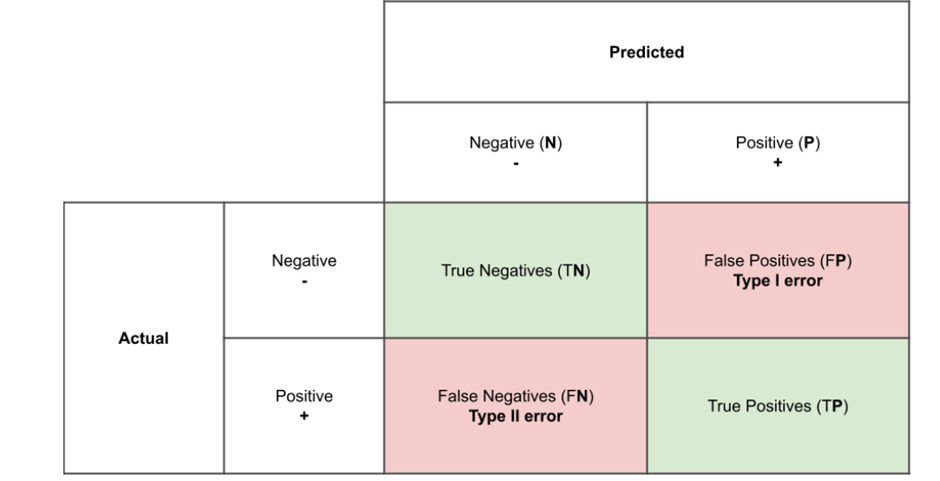

**`Confusion Metrix Term:`**
    
- True Positive (TP): Pelanggan diprediksi akan churn dan memang benar-benar churn.
- False Positive (FP): Pelanggan diprediksi akan churn, tetapi sebenarnya tidak churn, yang menyebabkan kerugian operasional karena pengeluaran promosi yang tidak perlu.
- False Negative (FN): Pelanggan diprediksi tidak akan churn, tetapi sebenarnya churn, mengakibatkan kehilangan pendapatan karena tidak ada tindakan pencegahan.
- True Negative (TN): Pelanggan diprediksi tidak akan churn dan memang tidak churn, yang membantu perusahaan menghindari pemborosan sumber daya.


Penggunaan F2-Score sangat relevan ketika fokus utama adalah mengurangi False Negative (FN), khususnya dalam konteks promosi yang bertujuan untuk mencegah kehilangan pelanggan yang berisiko churn. Dalam banyak situasi bisnis, terutama pada model prediksi churn, deteksi pelanggan yang berpotensi churn menjadi jauh lebih krusial daripada menghindari promosi yang tidak tepat sasaran. Hal ini disebabkan oleh dampak jangka panjang yang signifikan yang dapat ditimbulkan akibat kehilangan pelanggan yang sebenarnya berpotensi churn, baik dari sisi pendapatan maupun loyalitas pelanggan. F2-Score memberikan bobot yang lebih besar pada recall, yang berarti model menjadi lebih sensitif dalam mengidentifikasi pelanggan berisiko churn, meskipun dapat meningkatkan jumlah False Positives (FP). Dengan demikian, meskipun kemungkinan adanya pengeluaran untuk promosi yang kurang efektif, keuntungan utama dari pendekatan ini adalah memastikan bahwa pelanggan yang berpotensi churn tidak terlewatkan. Pendekatan ini sangat sesuai diterapkan pada industri dengan tingkat churn tinggi atau yang sangat bergantung pada retensi pelanggan, di mana upaya pencegahan kehilangan pelanggan lebih bernilai daripada pengeluaran yang tidak tepat sasaran.

---

# DATA UNDERSTANDING

### **Import Library**

In [210]:
# Library
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.patches as mpatches

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Feature Engineering
from sklearn.pipeline import Pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.preprocessing import OneHotEncoder, RobustScaler, MinMaxScaler, StandardScaler
from sklearn.compose import ColumnTransformer
import category_encoders as ce
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV


# Imbalance Dataset
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss

# Algorithm ML
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC

# Crossval
from sklearn.model_selection import RandomizedSearchCV, train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import fbeta_score, make_scorer

# Ignore Warning
import warnings
warnings.filterwarnings('ignore')


# Set max columns
pd.set_option('display.max_columns', None)

### **Data Profile**

| Column Name | Description |
| --- | --- |
|	Tenure                  | Lama menjadi pelanggan di perusahaan|
|	WarehouseToHome         | Jarak antara gudang dan rumah pelanggan|
|	NumberOfDeviceRegistered| Jumlah perangkat yang terdaftar pada pelanggan tertentu|
|	PreferedOrderCat        | Kategori pesanan yang lebih disukai oleh pelanggan bulan lalu|
|	SatisfactionScore       | Skor kepuasan pelanggan terhadap layanan|
|	MaritalStatus           | Status pernikahan pelanggan|
|	NumberOfAddress         | Jumlah alamat yang dimiliki oleh pelanggan|
|	Complaint               | Keluhan yang diajukan pelanggan dalam bulan terakhir|
|	DaySinceLastOrder       | Hari sejak pelanggan melakukan pesanan terakhir|
|	CashbackAmount          | Rata-rata cashback yang diterima pelanggan bulan lalu|
|	Churn                   | Identifikasi pengguna churn atau tidak. 1 untuk churn, 0 untuk tidak churn|


### **Dataset**

In [215]:
df = pd.read_csv('data_ecommerce_customer_churn.csv')
df.head()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0


### **Explore Dataset**

In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3941 entries, 0 to 3940
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tenure                    3747 non-null   float64
 1   WarehouseToHome           3772 non-null   float64
 2   NumberOfDeviceRegistered  3941 non-null   int64  
 3   PreferedOrderCat          3941 non-null   object 
 4   SatisfactionScore         3941 non-null   int64  
 5   MaritalStatus             3941 non-null   object 
 6   NumberOfAddress           3941 non-null   int64  
 7   Complain                  3941 non-null   int64  
 8   DaySinceLastOrder         3728 non-null   float64
 9   CashbackAmount            3941 non-null   float64
 10  Churn                     3941 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 338.8+ KB


In [220]:
display (df.describe(), df.describe(include='object'))

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
count,3747.000000,3772.000000,3941.000000,3941.000000,3941.000000,3941.000000,3728.000000,3941.000000,3941.000000
mean,10.081398,15.650583,3.679269,3.088302,4.237757,0.282416,4.531652,176.707419,0.171023
std,8.498864,8.452301,1.013938,1.381832,2.626699,0.450232,3.667648,48.791784,0.376576
min,0.000000,5.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,9.000000,3.000000,2.000000,2.000000,0.000000,2.000000,145.700000,0.000000
50%,9.000000,14.000000,4.000000,3.000000,3.000000,0.000000,3.000000,163.340000,0.000000
75%,16.000000,21.000000,4.000000,4.000000,6.000000,1.000000,7.000000,195.250000,0.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,1.000000,46.000000,324.990000,1.000000


,PreferedOrderCat,MaritalStatus
count,3941,3941
unique,6,3
top,Laptop & Accessory,Married
freq,1458,2055


In [222]:
df.isna().sum()

Tenure                      194
WarehouseToHome             169
NumberOfDeviceRegistered      0
PreferedOrderCat              0
SatisfactionScore             0
MaritalStatus                 0
NumberOfAddress               0
Complain                      0
DaySinceLastOrder           213
CashbackAmount                0
Churn                         0
dtype: int64

In [224]:
(df.isna().sum() / len(df) * 100).round(2)

Tenure                      4.92
WarehouseToHome             4.29
NumberOfDeviceRegistered    0.00
PreferedOrderCat            0.00
SatisfactionScore           0.00
MaritalStatus               0.00
NumberOfAddress             0.00
Complain                    0.00
DaySinceLastOrder           5.40
CashbackAmount              0.00
Churn                       0.00
dtype: float64

**Terdapat beberapa variabel yang memiliki missing value, diantaranya :**

- Tenure (4.92 %)
- WarehouseToHome (4.29 %)
- DaySinceLastOrder (5.4 %) Kebanyakan dari variabel ini adalah variabel continous. Kita perlu melakukan penanagan pada missing value ini agar dataset siap digunakan dalam model machine learning

**Data Duplikat**

In [228]:
df.shape

(3941, 11)

Terdapat 3941 baris dan 11 kolom

In [231]:
df.duplicated().sum()

671

Data yang duplikat sebesar 671

In [234]:
# Menghapus data duplikat
df = df.drop_duplicates()

# Mengetahui bentuk dataframe df setelah data duplikat dihapus
df.shape

(3270, 11)

Karena dalam dataset tidak terdapat ID pelanggan, maka setiap data dianggap sebagai duplikat yang valid. Oleh karena itu, langkah yang diambil untuk mengatasi masalah ini adalah dengan menghapus baris yang terduplikasi. Penghapusan data duplikat sangat penting untuk menjaga kualitas model machine learning yang dikembangkan, karena data yang duplikat dapat menyebabkan distorsi dalam hasil evaluasi pada data uji. Hal ini bisa menyebabkan bias yang tidak diinginkan, di mana informasi yang seharusnya hanya ada pada set pelatihan malah bocor ke dalam proses pengujian, mengakibatkan informasi yang tidak akurat mengenai kinerja model.

Setelah dilakukan penghapusan data duplikat sehingga menjadi  3270 baris dan 11 kolom

In [238]:
# Mengecek data unique di tiap kolom :
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,Tenure,36,"[15.0, 7.0, 27.0, 20.0, 30.0, 1.0, 11.0, 17.0,..."
1,WarehouseToHome,33,"[29.0, 25.0, 13.0, 15.0, 16.0, 11.0, 12.0, 7.0..."
2,NumberOfDeviceRegistered,6,"[4, 3, 6, 2, 5, 1]"
3,PreferedOrderCat,6,"[Laptop & Accessory, Mobile, Fashion, Others, ..."
4,SatisfactionScore,5,"[3, 1, 4, 2, 5]"
5,MaritalStatus,3,"[Single, Married, Divorced]"
6,NumberOfAddress,14,"[2, 5, 7, 8, 3, 1, 9, 4, 10, 11, 6, 19, 22, 21]"
7,Complain,2,"[0, 1]"
8,DaySinceLastOrder,22,"[7.0, nan, 8.0, 11.0, 2.0, 1.0, 4.0, 3.0, 6.0,..."
9,CashbackAmount,2335,"[143.32, 129.29, 168.54, 230.27, 322.17, 152.8..."


In [240]:
# Categorical Variables

cat_vars = [var for var in df.columns if df[var].dtype == 'O']
print(f'Terdapat {len(cat_vars)} fitur kategorikal:\n{cat_vars}')

Terdapat 2 fitur kategorikal:
['PreferedOrderCat', 'MaritalStatus']


In [242]:
# Numerical Variables

num_vars = [var for var in df.columns if df[var].dtype != 'O' and var !='Churn']

print(f'Terdapat {len(num_vars)} fitur numerik:\n{num_vars}')

Terdapat 8 fitur numerik:
['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'Complain', 'DaySinceLastOrder', 'CashbackAmount']


**Penanganan Anomali Data**

In [245]:
# Menampilkan unique value dari masing-masing variabel
variabel = ['PreferedOrderCat', 'MaritalStatus','Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'Complain', 'DaySinceLastOrder', 'CashbackAmount']

for cat in variabel:
    print(f'\nUnique value dari \n{cat} = {df[cat].unique()}')


Unique value dari 
PreferedOrderCat = ['Laptop & Accessory' 'Mobile' 'Fashion' 'Others' 'Mobile Phone' 'Grocery']

Unique value dari 
MaritalStatus = ['Single' 'Married' 'Divorced']

Unique value dari 
Tenure = [15.  7. 27. 20. 30.  1. 11. 17.  6. 16. 10. nan  8. 19.  0.  3.  5.  9.
 18. 12. 24.  4. 61. 25. 13. 14.  2. 21. 29. 26. 23. 31. 22. 28. 51. 60.
 50.]

Unique value dari 
WarehouseToHome = [ 29.  25.  13.  15.  16.  11.  12.   7.  26.  20.  14.   8.  21.  22.
  27.  18.  33.   9.  17.  nan   6.  31.  28.  10.  19.  32.  23.  30.
  35.  34.  24.   5.  36. 127.]

Unique value dari 
NumberOfDeviceRegistered = [4 3 6 2 5 1]

Unique value dari 
SatisfactionScore = [3 1 4 2 5]

Unique value dari 
NumberOfAddress = [ 2  5  7  8  3  1  9  4 10 11  6 19 22 21]

Unique value dari 
Complain = [0 1]

Unique value dari 
DaySinceLastOrder = [ 7. nan  8. 11.  2.  1.  4.  3.  6.  0. 14.  9. 10. 12.  5. 17. 30. 18.
 16. 13. 15. 46. 31.]

Unique value dari 
CashbackAmount = [143.32 129.29 168.5

In [247]:
df['PreferedOrderCat'].value_counts()

PreferedOrderCat
Laptop & Accessory    1213
Mobile Phone           725
Fashion                484
Mobile                 458
Grocery                241
Others                 149
Name: count, dtype: int64

Dapat dilihat pada kolom PreferedOrderCat Mobile Phone dan Mobile terdeteksi memiliki data yang serupa, sehingga kedua kolom ini akan digabungkan.

In [250]:
df['PreferedOrderCat'] = df['PreferedOrderCat'].replace('Mobile','Mobile Phone')
df['PreferedOrderCat'].value_counts()

PreferedOrderCat
Laptop & Accessory    1213
Mobile Phone          1183
Fashion                484
Grocery                241
Others                 149
Name: count, dtype: int64

**Deteksi Outliers**

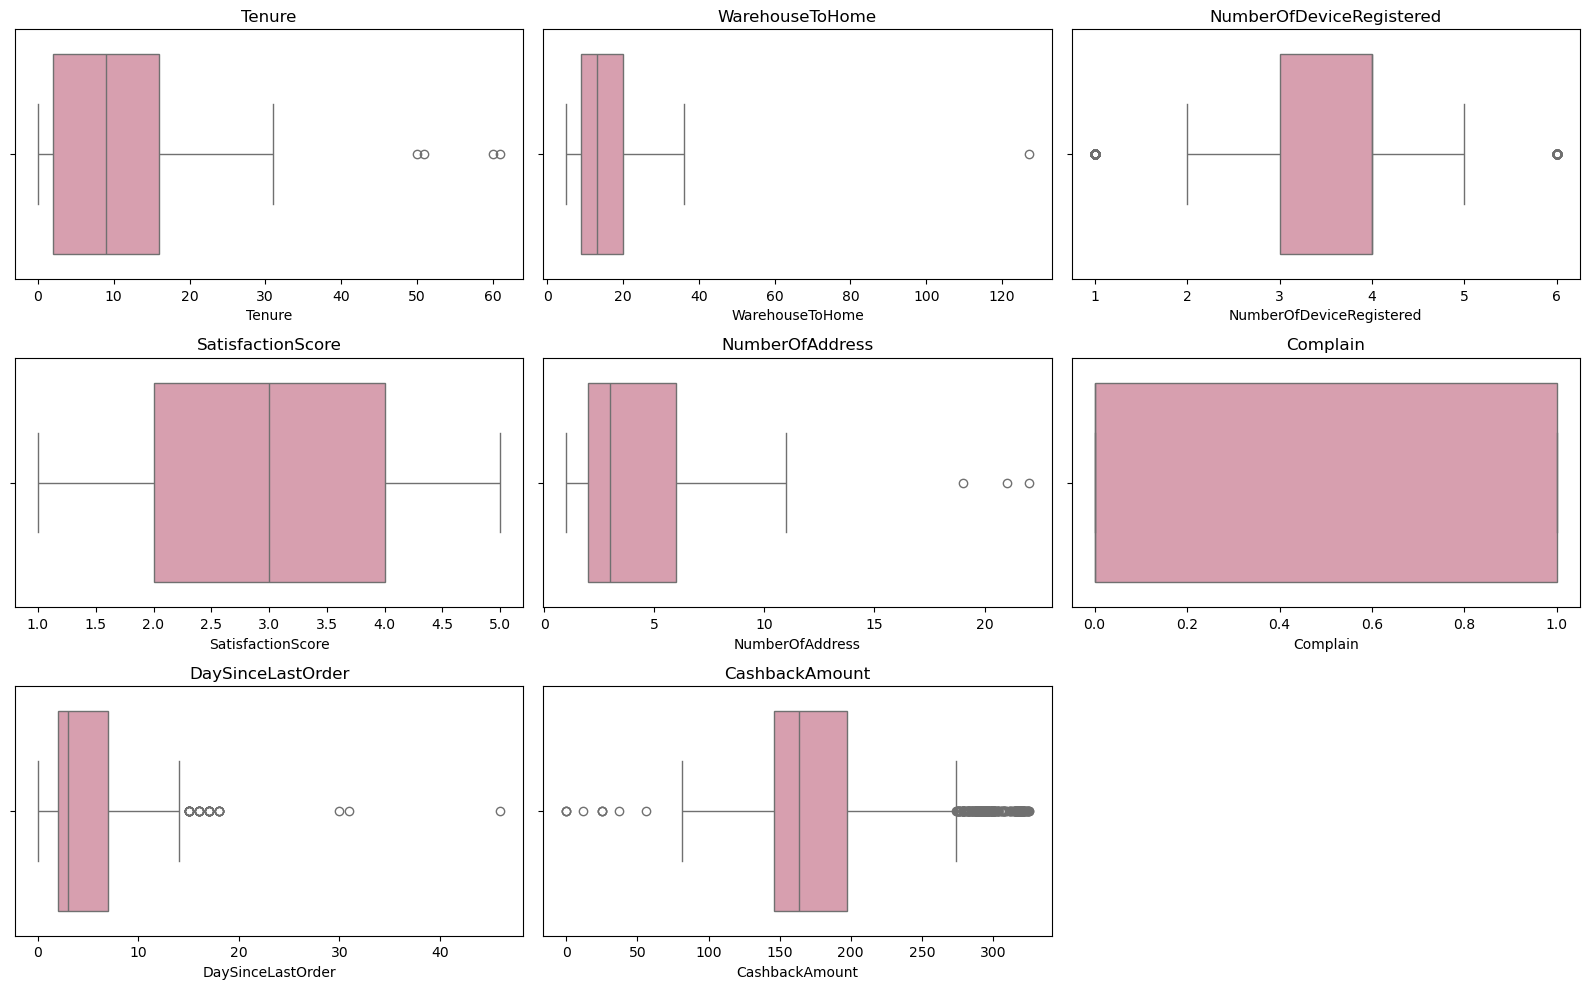

In [253]:
# Mengetahui outlier pada kolom numerikal menggunakan boxplot :

col_names = num_vars
plotnumber = 1
plt.figure(figsize=(16,10))

for kolom in col_names:
    plt.subplot(3,3, plotnumber)
    sns.boxplot(data=df, x=kolom, color='#E195AB')
    plt.title(kolom)
    plt.tight_layout()

    plotnumber += 1

Berdasarkan analisis menggunakan boxplot, terlihat bahwa terdapat beberapa nilai yang tergolong sebagai *outliers* dalam dataset ini. Meskipun demikian, *outliers* tersebut dianggap masih relevan dan wajar, bukan sebagai data yang mengandung kesalahan. Oleh karena itu, nilai-nilai tersebut tidak dihapus dari dataset dan tetap dipertahankan untuk analisis lebih lanjut. Selain itu, keberadaan *outliers* tersebut justru dapat memberikan kontribusi positif bagi model yang dibangun, karena data yang bervariasi dapat membantu model dalam mengenali pola-pola yang lebih kompleks dan meningkatkan kemampuannya dalam generalisasi. Dengan demikian, *outliers* ini tetap dianggap sebagai bagian dari dataset yang berguna untuk pelatihan model, meskipun mereka mungkin berada jauh dari nilai mayoritas data.

In [255]:
# Melihat distribusi data untuk mengetahui apakah data berdistribusi normal atau tidak :

from scipy.stats import normaltest

col=['Churn','Tenure','WarehouseToHome','DaySinceLastOrder','NumberOfDeviceRegistered','SatisfactionScore','NumberOfAddress','Complain','CashbackAmount']
distribusi=[]
for i in col:
    stats, pval=normaltest(df[i])
    if pval>0.05:
        distribusi.append('Terdistribusi Normal')
    else:
        distribusi.append('Tidak Terdistribusi Normal')
        
pd.DataFrame({'distribusi':distribusi},index=col)

,distribusi
Churn,Tidak Terdistribusi Normal
Tenure,Tidak Terdistribusi Normal
WarehouseToHome,Tidak Terdistribusi Normal
DaySinceLastOrder,Tidak Terdistribusi Normal
NumberOfDeviceRegistered,Tidak Terdistribusi Normal
SatisfactionScore,Tidak Terdistribusi Normal
NumberOfAddress,Tidak Terdistribusi Normal
Complain,Tidak Terdistribusi Normal
CashbackAmount,Tidak Terdistribusi Normal


**Persebaran Missing Value**

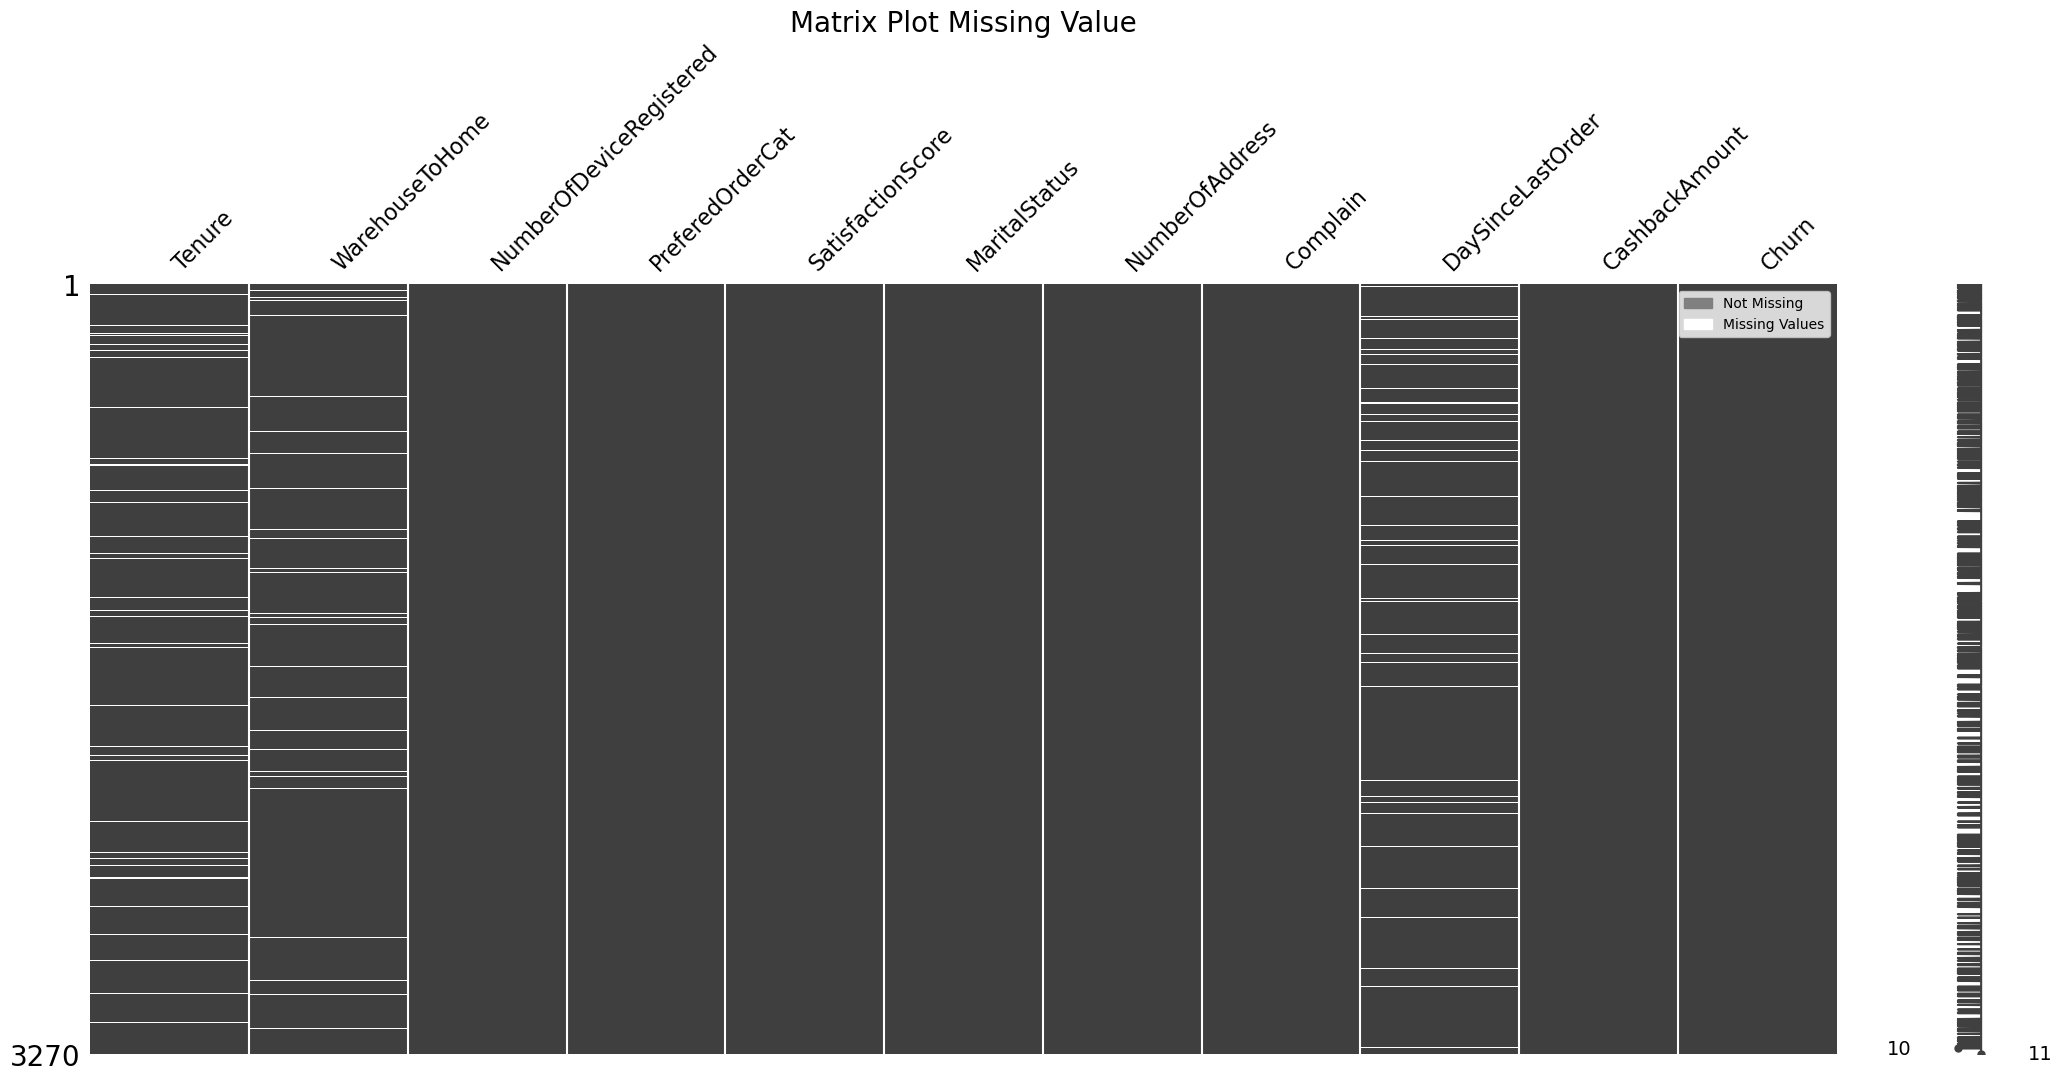

In [257]:
# Melihat missing value dengan matrix plot
msno.matrix(df)
gray_patch = mpatches.Patch(color='gray', label='Not Missing')
white_patch = mpatches.Patch(color='white', label='Missing Values')
plt.legend(handles=[gray_patch, white_patch])
plt.title('Matrix Plot Missing Value', fontsize=20)
plt.show()

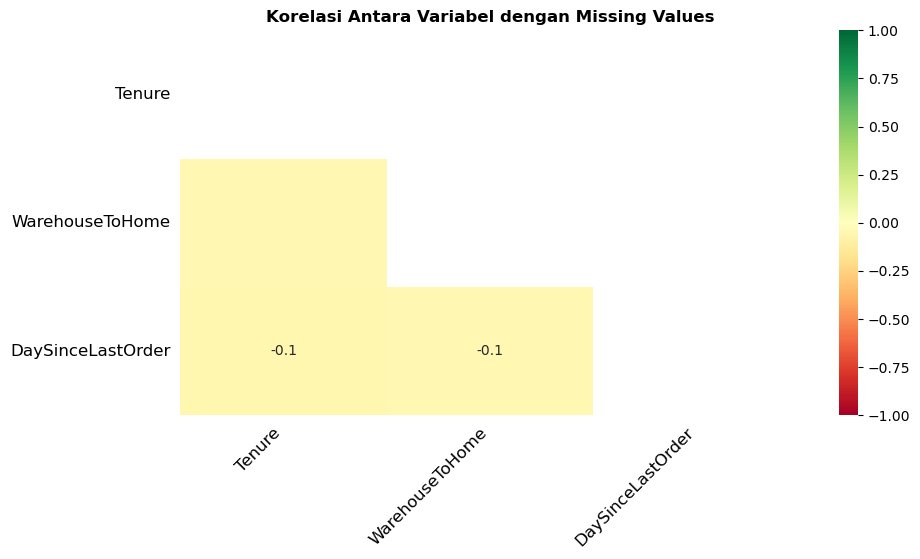

In [258]:
# Membuat heatmap untuk missing values 
msno.heatmap(df, cmap="RdYlGn", figsize=(10,5), fontsize=12).set_title('Korelasi Antara Variabel dengan Missing Values', size=12, weight='bold');
# Menampilkan heatmap
plt.show()

- **Missing Values:** Terdapat missing values pada Tenure, WarehouseToHome, dan DaySinceLastOrder, sehingga diperlukan metode imputasi yang tepat untuk mencegah bias analisis.
- **Korelasi Variabel:** Tidak ada korelasi kuat antar variabel numerik. Korelasi negatif lemah (-0.1) pada Tenure & DaySinceLastOrder serta WarehouseToHome & DaySinceLastOrder menunjukkan bahwa masa keanggotaan dan jarak ke gudang tidak terlalu mempengaruhi frekuensi transaksi.
- Berdasarkan analisis yang dilakukan, untuk mengatasi **missing values** pada kolom numerik dalam dataset seperti Tenure, WarehouseToHome, dan DaySinceLastOrder, penggunaan median sebagai strategi imputasi merupakan pilihan yang tepat. Hal ini dikarenakan median lebih robust terhadap outliers dan lebih akuratif dalam menggantikan nilai yang hilang pada kolom dengan distribusi yang tidak simetris (skewed).

In [262]:
# Mengetahui proporsi target (Churn) :
print(df['Churn'].value_counts())
print()

# persentase
print((df['Churn'].value_counts() / len(df['Churn']) * 100).round(2))

Churn
0    2736
1     534
Name: count, dtype: int64

Churn
0    83.67
1    16.33
Name: count, dtype: float64


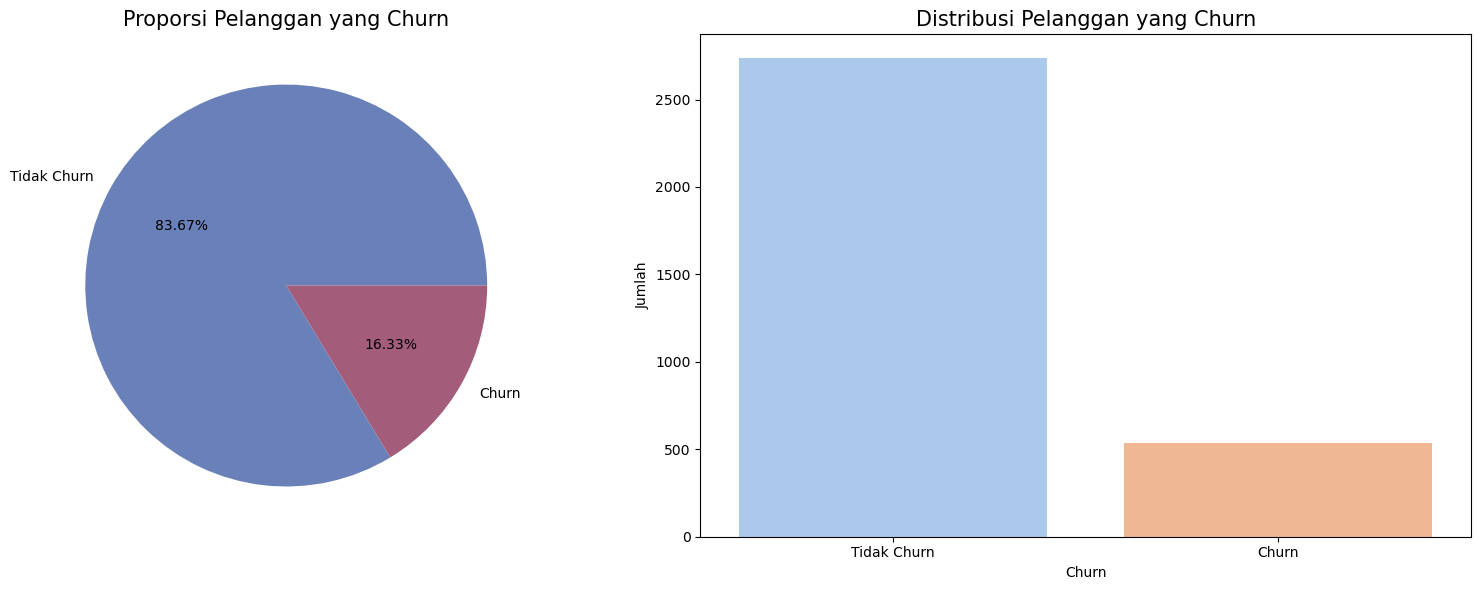

In [263]:
# Visualisasi 

# Menghitung distribusi churn
churn_counts = df['Churn'].value_counts()

# Membuat figure dengan dua subplot
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Pie Chart
axes[0].pie(churn_counts, labels=['Tidak Churn', 'Churn'], autopct='%1.2f%%', colors=['#6A80B9', '#A35C7A'])
axes[0].set_title('Proporsi Pelanggan yang Churn',fontsize=15)

# Bar Plot
sns.barplot(x=churn_counts.index, y=churn_counts.values, palette='pastel', ax=axes[1])
axes[1].set_xlabel('Churn')
axes[1].set_ylabel('Jumlah')
axes[1].set_title('Distribusi Pelanggan yang Churn',fontsize=15)
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['Tidak Churn', 'Churn'])

# Menampilkan plot
plt.tight_layout()
plt.show()


Dataset ini memiliki target variabel biner, yaitu **0 (tidak churn)** dan **1 (churn)**, dengan distribusi yang tidak seimbang atau imbalanced dataset. Dari total data yang tersedia, sebanyak **2.736 pelanggan (83,67%)** tetap menggunakan layanan (tidak churn), sedangkan hanya **534 pelanggan (16,33%)** yang  churn. Ketidakseimbangan ini menunjukkan bahwa jumlah pelanggan yang berhenti jauh lebih kecil dibandingkan dengan pelanggan yang tetap setia, sehingga dapat menjadi tantangan dalam proses pemodelan. Model prediktif yang dibangun cenderung lebih bias terhadap kelas mayoritas (tidak churn), yang berisiko menyebabkan kesalahan klasifikasi dalam mendeteksi pelanggan yang benar-benar churn. Akibatnya, model dapat memiliki akurasi tinggi secara keseluruhan tetapi performa yang buruk dalam mengenali pelanggan yang berpotensi churn, yang justru menjadi fokus utama dalam analisis ini. Untuk mengatasi permasalahan ini, akan diterapkan metode **Random Under Sampler** sebagai teknik resampling yang akan memeroses pengambilan sampel kembali atau pemilihan ulang data dari dataset yang ada.

### **Data Analysis**

### **Perbandingan Jumlah Churn Data Categorical**

In [271]:
# Kategorikal Terditi Dari Tiga Variabel  
categorical_cols = ['PreferedOrderCat', 'MaritalStatus', 'Complain']

# Mendefinisikan DataFrame untuk kategorikal 
df_categorical = df[categorical_cols + ['Churn']]

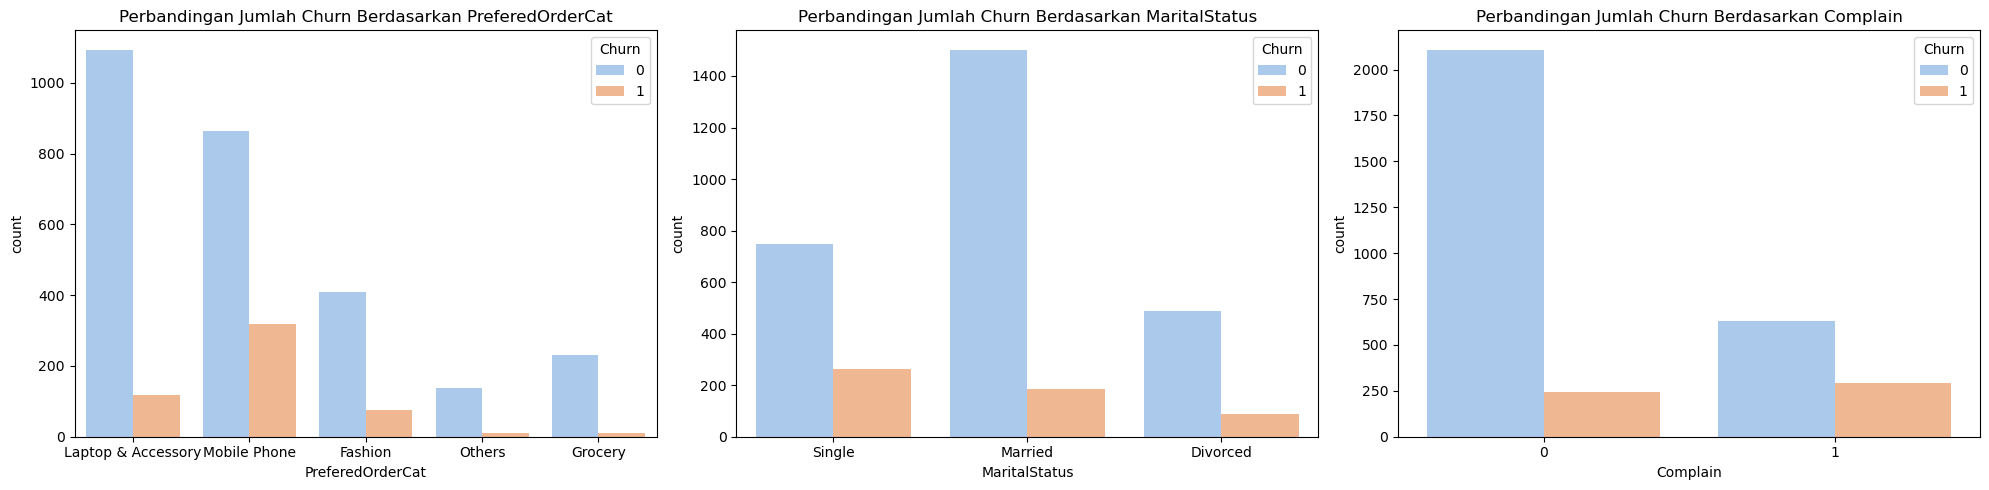

In [273]:
plt.figure(figsize=(20, 5))  # Mengatur ukuran figure menjadi lebih lebar untuk satu baris tiga kolom
c = 1

for i in categorical_cols:
    plt.subplot(1, len(categorical_cols), c)  # Mengatur subplot untuk 1 baris dan 3 kolom
    sns.countplot(x=i, hue='Churn', data=df_categorical, palette='pastel')
    plt.title(f'Perbandingan Jumlah Churn Berdasarkan {i}')
    c += 1

plt.tight_layout()
plt.show()

`PreferedOrderCat`
   
Jumlah churn tertinggi terdapat pada kategori **Mobile Phone**, hal ini mengindikasikan bahwa pelanggan yang membeli ponsel memiliki kecenderungan lebih besar untuk churn dibandingkan dengan kategori produk lainnya. sedangkan **Laptop & Accessory** memiliki jumlah pelanggan terbanyak tidak churn namun yang churnnya juga signifikan , sementara kategori **Fashion dan Others** menunjukkan jumlah churn yang lebih rendah. Kategori **Grocery** memiliki jumlah churn yang paling rendah di antara semua kategori, mengindikasikan bahwa pelanggan dalam kategori ini cenderung lebih setia atau memiliki tingkat retensi yang lebih baik dibandingkan kategori lainnya.

`MaritalStatus`
   
Jumlah churn tertinggi terdapat pada pelanggan **Single**, menunjukkan kecenderungan lebih besar untuk churn dibandingkan dengan status lainnya. Pelanggan **Married** memiliki churn yang lebih rendah, mengindikasikan retensi yang lebih baik, sementara pelanggan **Divorced** menunjukkan churn yang lebih rendah daripada single namun masih signifikan. Hal ini mengindikasikan bahwa status perkawinan memengaruhi kecenderungan churn, dengan single sebagai kelompok paling rentan.

`Complain`
   
Perbandingan jumlah churn berdasarkan keluhan (Complain) menunjukkan bahwa pelanggan yang tidak mengajukan **keluhan (0)** cenderung memiliki jumlah churn yang lebih rendah. Di sisi lain, pelanggan yang mengajukan **keluhan (1)** menunjukkan jumlah churn yang lebih tinggi, menandakan bahwa keluhan dapat menjadi faktor yang memengaruhi kecenderungan pelanggan untuk berhenti berlangganan. 

### **Perbandingan Jumlah Churn Data Numerical**

In [277]:
# Terdapat 2 jenis yaitu numerikal diskrit dan kontinu
numerical_con = ['Tenure', 'WarehouseToHome', 'DaySinceLastOrder', 'CashbackAmount']
numerical_dis = ['NumberOfDeviceRegistered', 'SatisfactionScore','NumberOfAddress']

# Mendefinisikan DataFrame untuk numerikal diskrit dan kontinu
df_numerical_con = df[numerical_con + ['Churn']]
df_numerical_dis = df[numerical_dis + ['Churn']]

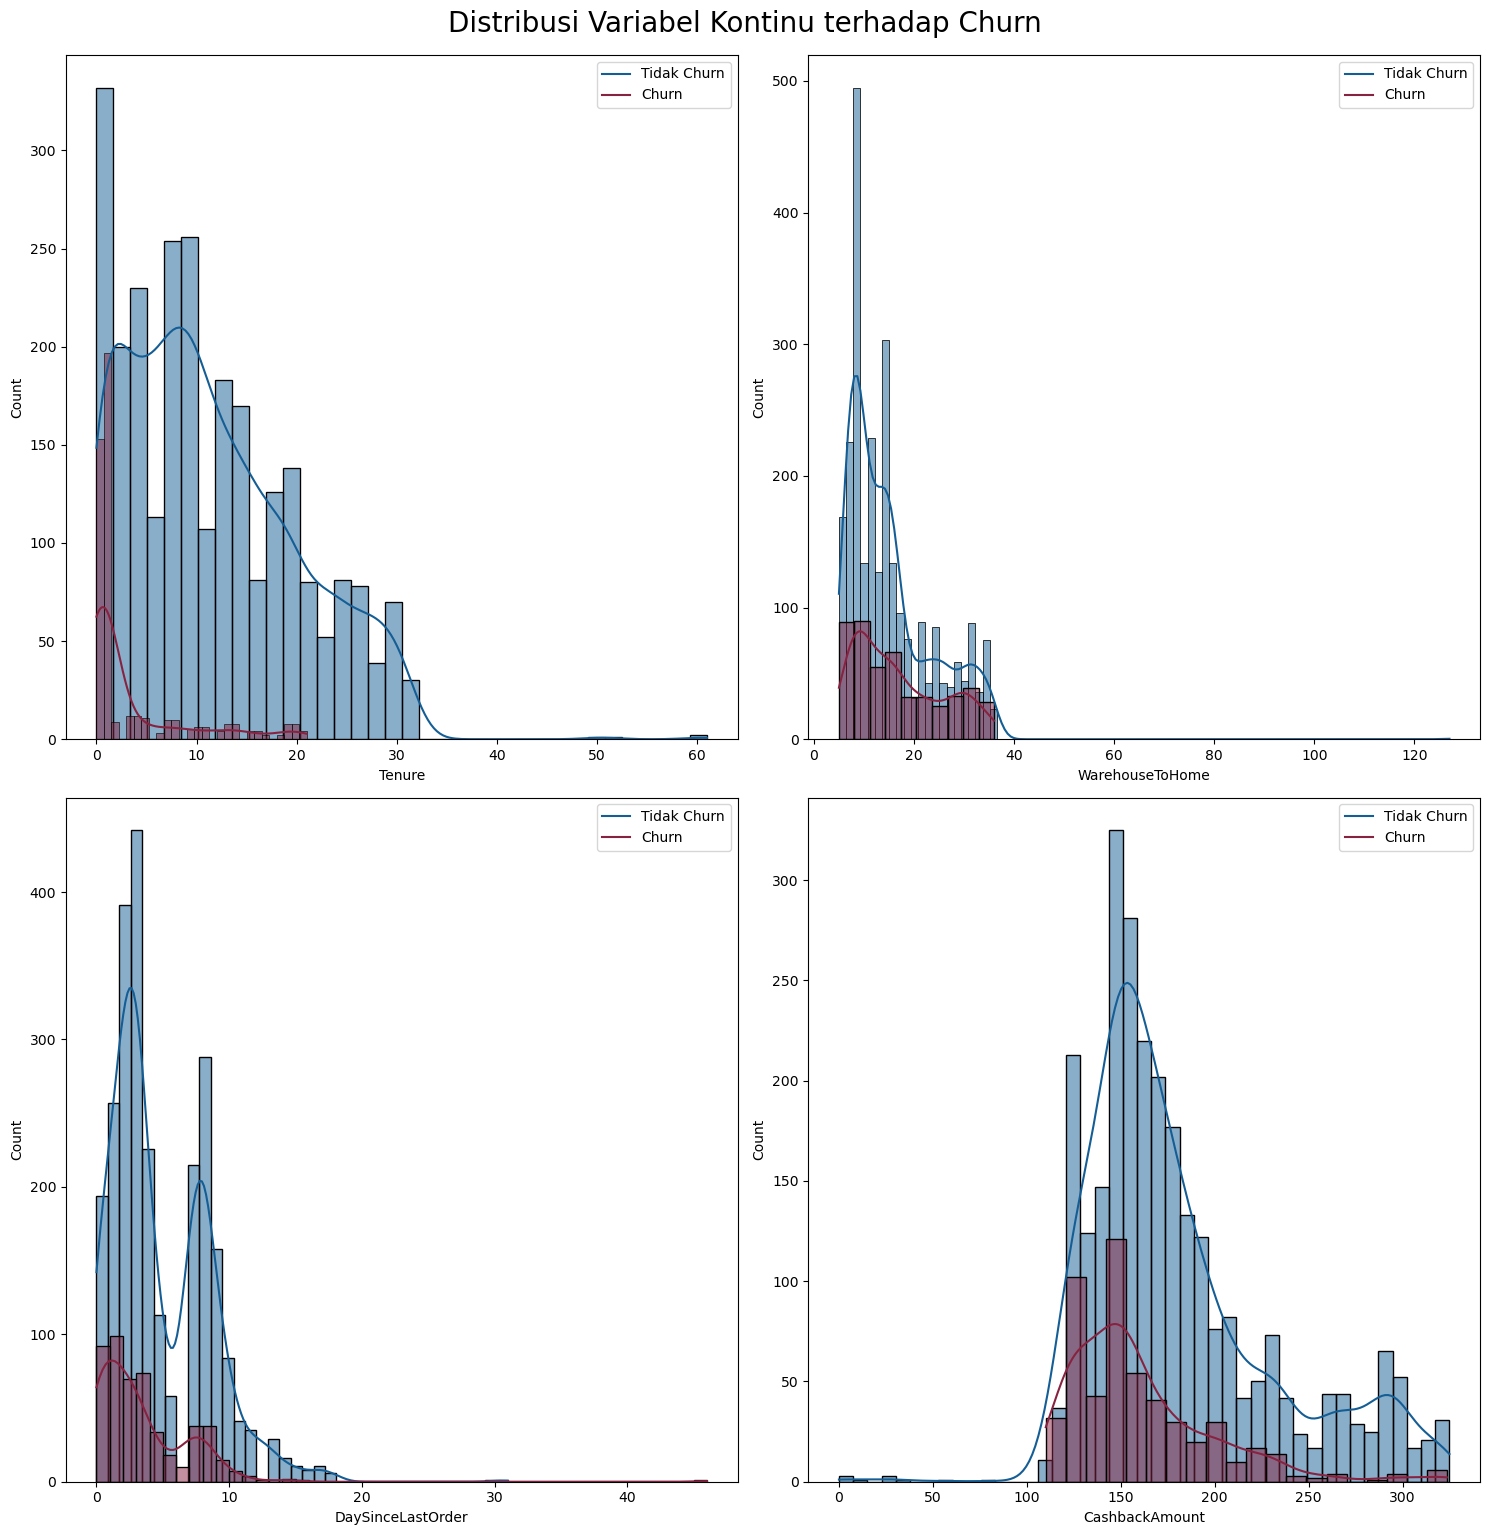

In [279]:
# Membuat figure besar agar subplot tidak bertumpuk
plt.figure(figsize=(15, 15))

# Variabel penghitung subplot
a = 1  

for i in numerical_con:
    plt.subplot(2, 2, a)
    sns.histplot(x=df[df['Churn'] == 0][i], kde=True, color='#155E95')
    sns.histplot(x=df[df['Churn'] == 1][i], kde=True, color='#872341')
    
    # Menambahkan legend
    plt.legend(labels=['Tidak Churn', 'Churn'])
    
    # Menyesuaikan tata letak
    plt.tight_layout()
    
    # Menambah counter subplot
    a += 1

# Mengatur judul utama di atas dan tengah
plt.suptitle('Distribusi Variabel Kontinu terhadap Churn', fontsize=20, y=1.02)

plt.show()

`Tenure`

Berdasarkan histogram, mayoritas pelanggan yang churn memiliki tenure yang sangat pendek, terutama di bawah 10 bulan, dengan lonjakan churn terjadi dalam 1–5 bulan pertama, menunjukkan kemungkinan ketidakpuasan awal atau faktor eksternal seperti penawaran dari kompetitor. Sebaliknya, pelanggan dengan tenure lebih panjang cenderung tetap berlangganan, menunjukkan adanya korelasi antara loyalitas dan durasi langganan. Distribusi pelanggan yang tidak churn lebih merata dan mencakup tenure yang lebih panjang, menandakan bahwa semakin lama pelanggan bertahan, semakin kecil kemungkinan mereka untuk churn.

`WarehouseToHome`

Mayoritas pelanggan memiliki WarehouseToHome di bawah 20, dengan churn lebih tinggi pada rentang 5–20. Namun, churn tidak secara langsung dipengaruhi oleh jarak atau waktu pengiriman, melainkan kemungkinan dipengaruhi oleh faktor lain seperti kualitas layanan, harga, atau pengalaman pengguna. Untuk mengurangi churn, perusahaan perlu menganalisis aspek-aspek tersebut dan meningkatkan kepuasan pelanggan dalam proses pengiriman.

`DaySinceLastOrder`

Mayoritas pelanggan memiliki DaysSinceLastOrder (jumlah hari sejak pesanan terakhir) yang rendah, dengan sebagian besar pelanggan tidak churn  dan churn berada dalam rentang kurang dari 10 hari. Pelanggan yang churn cenderung memiliki DaysSinceLastOrder yang lebih kecil, menunjukkan bahwa mereka berhenti menggunakan layanan tidak lama setelah melakukan pesanan terakhir.

`CashbackAmount`

Sebagian besar pelanggan yang tetap menggunakan layanan cenderung menerima cashback dalam jumlah sedang hingga tinggi. Puncak distribusi berada di sekitar rentang 100-150. Sebagian besar transaksi terkonsentrasi pada rentang cashback tertentu, dengan sedikit transaksi yang menawarkan jumlah cashback yang ekstrem, baik terlalu tinggi maupun terlalu rendah.

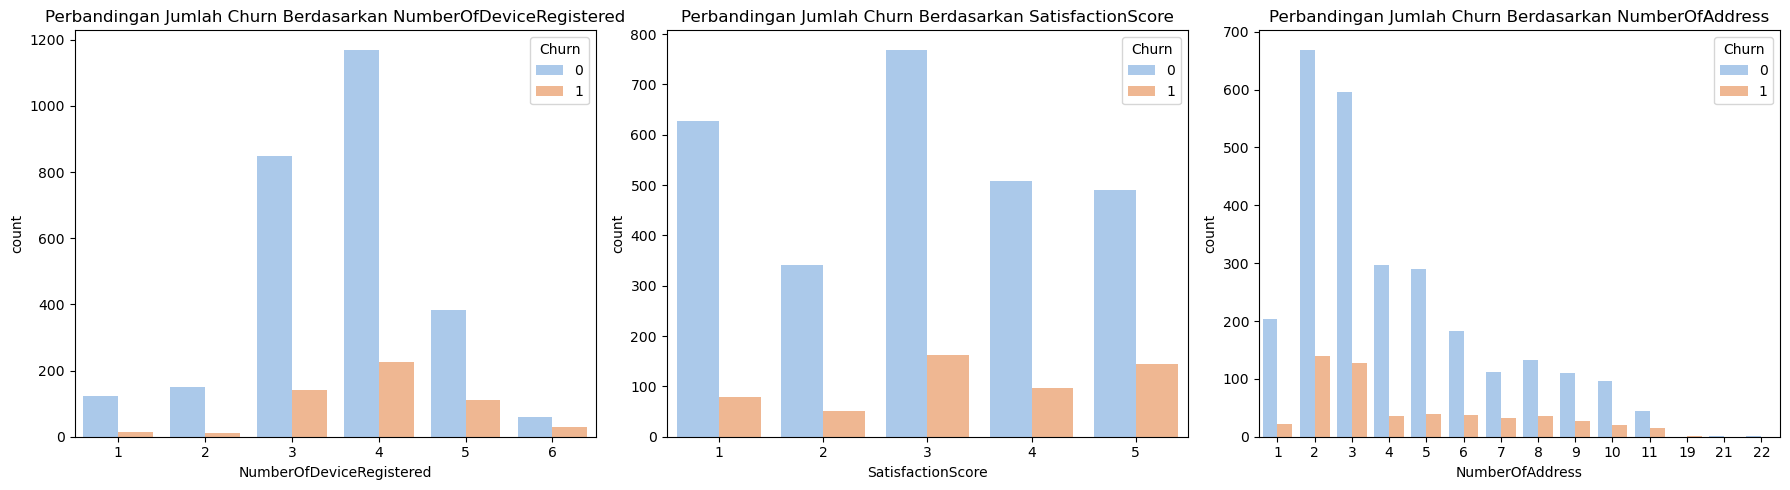

In [282]:
plt.figure(figsize=(18, 5))  # Mengatur ukuran figure menjadi lebih lebar untuk satu baris tiga kolom
c = 1

for i in numerical_dis:
    plt.subplot(1, len(numerical_dis), c)  # Mengatur subplot untuk 1 baris dan 3 kolom
    sns.countplot(x=i, hue='Churn', data=df_numerical_dis, palette='pastel')
    plt.title(f'Perbandingan Jumlah Churn Berdasarkan {i}')
    c += 1

plt.tight_layout()
plt.show()

`NumberOfDeviceRegistered` 

Pengguna dengan 4 perangkat terdaftar diikuti oleh pengguna  3 dan 5 perangkat terdaftar tercatat memiliki tingkat churn yang jauh lebih tinggi dibandingkan dengan pengguna dengan jumlah perangkat lainnya. Hal ini mengindikasikan adanya masalah spesifik yang terkait dengan penggunaan 4,3 dan 5 perangkat, seperti masalah kompatibilitas, beban penggunaan yang lebih tinggi, atau perubahan kebutuhan pengguna.

`SatisfactionScore`

Pelanggan dengan skor kepuasan tinggi cenderung lebih loyal dan bertahan lebih lama sebagai pelanggan. Sebaliknya, Pelanggan dengan skor kepuasan rendah, terutama yang berada di kisaran "netral" (skor 3), memiliki risiko churn yang jauh lebih tinggi.

`NumberOfAddress` 

Pelanggan yang memiliki 2 dan 3 alamat terdaftar cnderung lebih rentan terhadap churn dibandingkan dengan pelanggan yang tercatat dengan lebih banyak alamat. Hal ini  mengindikasikan bahwa pelanggan dengan alamat yang lebih sedikit cenderung kurang setia atau lebih sering berpindah layanan, sementara pelanggan dengan lebih banyak alamat menunjukkan loyalitas dan kestabilan yang lebih tinggi.

---

# DATA PREPROCESSING AND MODELING

**`Berdasarkan Data Cleaning and Analytics, akan dilakukan preprocessing sebagai berikut:`**

- Handling missing value dengan SimpleImputer dengan strategy median pada Tenure, WarehouseToHome, DaySinceLastOrder sesuai dengan hasil analisis.
- OneHotEncoding pada MaritalStatus yang hanya memiliki 3 kategori tanpa urutan.
- OneHotEncoding pada PreferedOrderCat yang memiliki 5 kategori tanpa urutan tertentu.

### **Data Preprocessing**

**`Define X and Y`**

Memisahkan fitur dan target dalam data yang akan digunakan untuk melatih model machine learning, dengan X berisi data fitur (atribut), dan y berisi data target (nilai yang ingin diprediksi).

In [290]:
# Pisahkan fitur dan label
X = df.drop(columns=['Churn'])  # Hanya fitur, tanpa kolom label
y = df['Churn']  # Label

**`Data splitting`**

Dataset dibagi menjadi data latih/train (80%) dan data uji/test (20%) menggunakan train_test_split dengan random_state=0 untuk konsistensi, serta stratify=y agar proporsi kelas target (churn) tetap seimbang di kedua subset. Tujuannya adalah mengevaluasi performa model secara akurat dan menghindari bias evaluasi.

In [293]:
# Melakukan data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=0)
display(X_train.shape, X_test.shape)

(2616, 10)

(654, 10)

**`Handling Missing Value: Tenure, WarehouseToHome, DaySinceLastOrder`**

Penanganan nilai yang hilang pada fitur Tenure, WarehouseToHome, dan DaySinceLastOrder bertujuan untuk meningkatkan akurasi model dan mencegah distorsi data. Fitur-fitur ini penting untuk analisis churn dan kepuasan pelanggan, karena Tenure menunjukkan durasi penggunaan layanan, WarehouseToHome terkait waktu pengiriman, dan DaySinceLastOrder mengukur frekuensi pembelian.

**`Encoding: MaritalStatus, PreferedOrderCat`**

Tujuan dari encoding fitur MaritalStatus dan PreferedOrderCat menggunakan metode one-hot encoding adalah untuk mengonversi data kategori menjadi bentuk numerik agar dapat digunakan oleh model machine learning. 

In [299]:
# Buat preprocessor menggunakan Pipeline
preprocessor = ColumnTransformer([
    ('Numerical 1', Pipeline([
        ('Imputer 1', SimpleImputer(strategy='median')),
        ('Scaler 1', RobustScaler())
    ]), ['Tenure', 'WarehouseToHome', 'DaySinceLastOrder']),

    ('Numerical 2', Pipeline([
        ('Scaler 2', RobustScaler())
    ]), ['NumberOfDeviceRegistered', 'NumberOfAddress', 'SatisfactionScore', 'CashbackAmount']),

    ('Categorical', Pipeline([
        ('Encoder', OneHotEncoder(handle_unknown='ignore'))
    ]), ['PreferedOrderCat', 'MaritalStatus', 'Complain'])
], remainder='passthrough')  # Jika ingin menyertakan fitur lain yang tidak disebutkan

### **Model Benchmarking**

**`Tanpa Pembobotan Kelas atau Resampel`**

In [303]:
# metrics
f2_score = make_scorer(fbeta_score, beta=2)

In [305]:
logreg = LogisticRegression(random_state=0)
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier(random_state=0)
rf = RandomForestClassifier(random_state=0)
ada = AdaBoostClassifier(tree, random_state=0)
gbc = GradientBoostingClassifier(random_state=0)
xgb = XGBClassifier(random_state=0)
lgb = LGBMClassifier(random_state=0)
svc = SVC(random_state=0)

In [307]:
models = [logreg, knn, tree, rf, ada, gbc, xgb, lgb, svc]
score=[]
rata=[]
std=[]

f2_score = make_scorer(fbeta_score,beta=2)

for i in models:
    skfold=StratifiedKFold(n_splits=5)
    estimator=Pipeline([
        ('preprocess',preprocessor),
        ('model',i)])
    model_cv=cross_val_score(estimator,X_train,y_train,cv=skfold,scoring=f2_score)
    score.append(model_cv)
    rata.append(model_cv.mean())
    std.append(model_cv.std())
    
pd.DataFrame({
    'model':['Regresi Logistik', 'KNN', 'Decision Tree', 'Random Forest', 'AdaBoost', 'Gradient Boosting', 'XGBoost', 'LightGBM', 'SVC'],
    'mean F2':rata,
    'sdev':std}).set_index('model').sort_values(by='mean F2',ascending=False)

[LightGBM] [Info] Number of positive: 341, number of negative: 1751
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000521 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 383
[LightGBM] [Info] Number of data points in the train set: 2092, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.163002 -> initscore=-1.636060
[LightGBM] [Info] Start training from score -1.636060
[LightGBM] [Info] Number of positive: 342, number of negative: 1751
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000282 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 383
[LightGBM] [Info] Number of data points in the train set: 2093, number of used features: 17
[LightGBM] [Info] [binary:Bo

,mean F2,sdev
model,,
XGBoost,0.702507,0.031203
LightGBM,0.675507,0.029851
AdaBoost,0.660412,0.051339
Decision Tree,0.655406,0.038482
Random Forest,0.643688,0.031693
Gradient Boosting,0.599828,0.043568
Regresi Logistik,0.472822,0.045772
SVC,0.446273,0.022249
KNN,0.416610,0.036593


**`Pembobotan Kelas`**

In [316]:
logreg = LogisticRegression(random_state=0, class_weight='balanced')
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier(random_state=0, class_weight='balanced')
rf = RandomForestClassifier(random_state=0, class_weight='balanced')
ada = AdaBoostClassifier(tree, random_state=0)
gbc = GradientBoostingClassifier(random_state=0)
xgb = XGBClassifier(random_state=0, class_weight='balanced')
lgb = LGBMClassifier(random_state=0, class_weight='balanced')
svc = SVC(random_state=0, class_weight='balanced')

In [317]:
models = [logreg, knn, tree, rf, ada, gbc, xgb, lgb, svc]
score=[]
rata=[]
std=[]

f2_score = make_scorer(fbeta_score,beta=2)

for i in models:
    skfold=StratifiedKFold(n_splits=5)
    estimator=Pipeline([
        ('preprocess',preprocessor),
        ('model',i)])
    model_cv=cross_val_score(estimator,X_train,y_train,cv=skfold,scoring=f2_score)
    score.append(model_cv)
    rata.append(model_cv.mean())
    std.append(model_cv.std())
    
pd.DataFrame({
    'model':['Regresi Logistik', 'KNN', 'Decision Tree', 'Random Forest', 'AdaBoost', 'Gradient Boosting', 'XGBoost', 'LightGBM', 'SVC'],
    'mean F2':rata,
    'sdev':std}).set_index('model').sort_values(by='mean F2',ascending=False)

[LightGBM] [Info] Number of positive: 341, number of negative: 1751
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000385 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 383
[LightGBM] [Info] Number of data points in the train set: 2092, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Info] Number of positive: 342, number of negative: 1751
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000790 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 383
[LightGBM] [Info] Number of data points in the train set: 2093, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [I

,mean F2,sdev
model,,
LightGBM,0.772523,0.029844
SVC,0.728504,0.033164
XGBoost,0.702507,0.031203
Regresi Logistik,0.693690,0.032821
Decision Tree,0.610844,0.070097
Random Forest,0.609879,0.016713
AdaBoost,0.606488,0.075275
Gradient Boosting,0.599828,0.043568
KNN,0.416610,0.036593


**`Resampel`**

In [312]:
logreg = LogisticRegression(random_state=0)
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier(random_state=0)
rf = RandomForestClassifier(random_state=0)
ada = AdaBoostClassifier(tree, random_state=0)
gbc = GradientBoostingClassifier(random_state=0)
xgb = XGBClassifier(random_state=0)
lgb = LGBMClassifier(random_state=0)
svc = SVC(random_state=0)

In [313]:
models = [logreg, knn, tree, rf, ada, gbc, xgb, lgb, svc]
score=[]
rata=[]
std=[]

f2_score = make_scorer(fbeta_score,beta=2)

for i in models:
    rus = RandomUnderSampler(random_state=0)
    skfold=StratifiedKFold(n_splits=5)
    estimator=Pipeline([
        ('preprocess',preprocessor),
         ('resampling', rus),
        ('model',i)])
    model_cv=cross_val_score(estimator,X_train,y_train,cv=skfold,scoring=f2_score)
    score.append(model_cv)
    rata.append(model_cv.mean())
    std.append(model_cv.std())
    
pd.DataFrame({
    'model':['Regresi Logistik', 'KNN', 'Decision Tree', 'Random Forest', 'AdaBoost', 'Gradient Boosting', 'XGBoost', 'LightGBM', 'SVC'],
    'mean F2':rata,
    'sdev':std}).set_index('model').sort_values(by='mean F2',ascending=False)

[LightGBM] [Info] Number of positive: 341, number of negative: 341
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000280 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 352
[LightGBM] [Info] Number of data points in the train set: 682, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

,mean F2,sdev
model,,
Random Forest,0.780986,0.021584
LightGBM,0.757526,0.022155
XGBoost,0.754412,0.022648
Gradient Boosting,0.751813,0.034474
AdaBoost,0.700864,0.031787
Decision Tree,0.696185,0.033183
SVC,0.690354,0.022299
Regresi Logistik,0.688025,0.024438
KNN,0.636605,0.036708


Hasil evaluasi model dasar dengan resampling saja menggunakan smote, nearmiss, rus, dan ros. Menunjukkan bahwa Random Forest dengan resampling RUS memiliki F2 Score tertinggi (0.780) dan stabilitas yang sangat baik (std 0.021). Sementara itu, LightGBM dengan resampling RUS memperoleh F2 Score 0.0.757 dengan sedikit lebih tinggi standar deviasinya (0.022). Ini menunjukkan bahwa Random Forest lebih efektif dalam menangani ketidakseimbangan data menggunakan teknik resampling RUS dibandingkan LightGBM, meskipun keduanya memberikan hasil yang cukup baik.

Model Random Forest - RUS dan LightGBM - RUS  dipilih menjadi 2 model yang paling optimal dengan nilai F2 Score paling tinggi. Selanjutnya, kedua model tersebut akan dilakukan hyperparamter tuningg

**`Apply Best Model & Evaluate Parameter`**

In [322]:
#Apply Best Model #1 to Test Data
#----------------
#Model      : Random Forest
#Resampling : RandomUnderSampler

#Create Pipeline
pipe_rf = Pipeline([
    ('prep', preprocessor),
    ('imba', rus),
    ('algo', rf)
])

#Fit Pipeline
pipe_rf.fit(X_train, y_train)

print(f" Train F2 score : {fbeta_score(y_train, pipe_rf.predict(X_train), beta=2)}")
print(f" Test F2 score  : {fbeta_score(y_test, pipe_rf.predict(X_test), beta=2)}")

 Train F2 score : 0.9046610169491526
 Test F2 score  : 0.7903494176372712


In [324]:
#Apply Best Model # 2 to Test Data
#----------------
#Model      : Light GBM
#Resampling : RandomUnderSampler


#Create Pipeline
pipe_lgb = Pipeline([
    ('prep', preprocessor),
    ('imba', rus),
    ('algo', lgb)
])

#Fit Pipeline
pipe_lgb.fit(X_train, y_train)

print(f" Train F2 score : {fbeta_score(y_train,pipe_lgb.predict(X_train), beta=2)}")
print(f" Test F2 score  : {fbeta_score(y_test,pipe_lgb.predict(X_test), beta=2)}")

[LightGBM] [Info] Number of positive: 427, number of negative: 427
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000353 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 379
[LightGBM] [Info] Number of data points in the train set: 854, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
 Train F2 score : 0.9027484143763214
 Test F2 score  : 0.7377049180327869


### **Hyperparameter Tuning**

Hyperparameter Tuning adalah proses mencari kombinasi hyperparameter terbaik untuk model machine learning. Hyperparameter sendiri adalah pengaturan yang ditentukan sebelum pelatihan dimulai dan mempengaruhi proses serta hasil pelatihan.

**`Random Forest`**

- `random_state`: Untuk memastikan hasil yang konsisten.
- `n_estimators`: Jumlah pohon keputusan yang dibangun dalam Random Forest.
- `min_samples_split`: Minimum jumlah sampel yang diperlukan untuk membagi node.
- `max_features`: Jumlah fitur yang digunakan dalam setiap pembagian node.
- `max_depth`: Kedalaman maksimal pohon keputusan untuk mencegah overfitting.

In [118]:
# Custom F2 scorer
f2_score = make_scorer(fbeta_score, beta=2)

# Hyperparameter space for Random Forest
param_grid = {
    'model__random_state': [0, 42, 100],  # Variasi random_state
    'model__n_estimators': [100, 200, 300, 500],  # Variasi n_estimators
    'model__min_samples_split': [2, 5, 10],  # Variasi min_samples_split
    'model__max_features': ['sqrt', 'log2', None],  # Variasi max_features
    'model__max_depth': [10, 15, 20, 25]  # Variasi max_depth 
}

# Benchmark model 2
rf = RandomForestClassifier(random_state=0) 
rus = RandomUnderSampler(random_state=0)

# Create the algorithm chains
pipe_model = Pipeline([
        ('transformer', preprocessor),  # preprocessor is a ColumnTransformer
        ('balancing', rus), 
        ('model', rf)
        ])


# RandomizedSearchCV dengan F2 scorer
grid_rf = GridSearchCV(
    estimator = pipe_model, 
    param_grid=param_grid,  # Ubah nama variabel jika perlu
    cv=skfold,  # Pastikan skfold sudah didefinisikan sebelumnya
    scoring=f2_score,  # Menggunakan F2 score
    n_jobs=-1
)

# Fit the grid search model
grid_rf.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('Numerical '
                                                                         '1',
                                                                         Pipeline(steps=[('Imputer '
                                                                                          '1',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('Scaler '
                                                                                          '1',
                                                                                          RobustScaler())]),
                                                                         ['Tenure',
                                                                          'WarehouseToHome',
                                                                          'DaySinceLastOrder']),
                                                                        ('Numerical '
                                                                         '2',...
                                        RandomUnderSampler(random_state=0)),
                                       ('model',
                                        RandomForestClassifier(random_state=0))]),
             n_jobs=-1,
             param_grid={'model__max_depth': [10, 15, 20, 25],
                         'model__max_features': ['sqrt', 'log2', None],
                         'model__min_samples_split': [2, 5, 10],
                         'model__n_estimators': [100, 200, 300, 500],
                         'model__random_state': [0, 42, 100]},
             scoring=make_scorer(fbeta_score, response_method='predict', beta=2))

In [119]:
print(grid_rf.best_score_)
print(grid_rf.best_params_)

0.7865034767951424
{'model__max_depth': 15, 'model__max_features': 'sqrt', 'model__min_samples_split': 2, 'model__n_estimators': 500, 'model__random_state': 100}


**`Parameter terbaik untuk Model Random Forest`**

- `model__max_depth`: 15
- `model__max_features`: sqrt
- `model__min_samples_split`: 2
- `model__n_estimators`: 500
- `model__random_state`: 100

In [127]:
print(f" Train F2 score : {fbeta_score(y_train, grid_rf.predict(X_train), beta=2)}")
print(f" Test F2 score  : {fbeta_score(y_test, grid_rf.predict(X_test), beta=2)}")

 Train F2 score : 0.9004639392661324
 Test F2 score  : 0.7986688851913477


In [128]:
# Definisikan pipeline dengan benar
model_pipe = Pipeline([
    ('transformer', preprocessor),  # pastikan preprocessor didefinisikan dengan benar
    ('resampler', rus),             # pastikan resampling (rus) didefinisikan dengan benar
    ('model', rf)                   # pastikan rf (Random Forest) sudah didefinisikan
])

# Melatih model dengan data pelatihan
model_pipe.fit(X_train, y_train)

# Melakukan prediksi
y_pred_default_rf = model_pipe.predict(X_test)

# Menghitung F2 Score
f2score_rf_benchmark = fbeta_score(y_test, y_pred_default_rf, beta=2)

# Menampilkan F2 Score
f2score_rf_benchmark

0.7903494176372712

In [129]:
# Mengambil model terbaik dari GridSearchCV
rf_tuning = grid_rf.best_estimator_

# Melatih model dengan data pelatihan
rf_tuning.fit(X_train, y_train)

# Melakukan prediksi
y_pred_rf_tuning = rf_tuning.predict(X_test)

# Menghitung F2 Score
f2score_rf_tuning = fbeta_score(y_test, y_pred_rf_tuning, beta=2)

# Menampilkan F2 Score
f2score_rf_tuning

0.7986688851913477

----

**`Light GBM`**

- `model__max_bi`: Menentukan jumlah bin untuk membagi data, mempengaruhi akurasi dan penggunaan memori
- `model__num_leas`: Menentukan jumlah daun dalam pohon keputusan, mempengaruhi kompleksitas model dan risiko overfitting
- `model__min_data_ineaf`: Menentukan jumlah minimum data pada setiap daun, mencegah overfitting dengan menghindari daun terlalu kecil
- `model__num_itetion`: Menentukan jumlah iterasi atau pohon yang dibangun, semakin banyak iterasi, semakin akurat model, tapi berisiko ovefitting
- `model__learng_ra`: Mengatur seberapa besar langkah perbaikan pada setiap iterasi, nilai kecil membuat model lebih stabil, tetapi lambat
- `model__rdom_ste`: Menetapkan angka acak untuk reprodusibilitas model, memastikan hasil yang konsisten setiap kali dijalankan

In [326]:
# Custom F2 scorer
f2_scorer = make_scorer(fbeta_score, beta=2)

lgb = LGBMClassifier(random_state=1)
rus = RandomUnderSampler(random_state=0)

# Pipeline with preprocessing and resampling
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('sampler', rus),
    ('model', lgb)
])

# Hyperparameter grid (ensure all values are inside lists)
param_grid = {
    'model__max_bin':[150,200,255],
    'model__num_leaves':[31, 21, 41, 51],
    'model__min_data_in_leaf': [10,15,20],
    'model__num_iterations':[100,75, 125, 150],
    'model__learning_rate': [0.1, 0.075, 0.125, 0.05],
    'model__random_state': [0]
}

# Grid Search with cross-validation
grid_lgb = GridSearchCV(
    estimator=pipeline, 
    param_grid=param_grid,  
    cv=skfold,  # Make sure skfold is defined earlier (StratifiedKFold or KFold)
    scoring=f2_scorer,  # Use the F2 scorer
    n_jobs=-1,
    verbose=2  # Optional: set verbose to 2 to see progress during grid search
)

# Fitting GridSearchCV
grid_lgb.fit(X_train, y_train)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Info] Number of positive: 427, number of negative: 427
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000363 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 274
[LightGBM] [Info] Number of data points in the train set: 854, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('Numerical '
                                                                         '1',
                                                                         Pipeline(steps=[('Imputer '
                                                                                          '1',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('Scaler '
                                                                                          '1',
                                                                                          RobustScaler())]),
                                                                         ['Tenure',
                                                                          'WarehouseToHome',
                                                                          'DaySinceLastOrder']),
                                                                        ('Numerical '
                                                                         '2'...
                                       ('model',
                                        LGBMClassifier(random_state=1))]),
             n_jobs=-1,
             param_grid={'model__learning_rate': [0.1, 0.075, 0.125, 0.05],
                         'model__max_bin': [150, 200, 255],
                         'model__min_data_in_leaf': [10, 15, 20],
                         'model__num_iterations': [100, 75, 125, 150],
                         'model__num_leaves': [31, 21, 41, 51],
                         'model__random_state': [0]},
             scoring=make_scorer(fbeta_score, response_method='predict', beta=2),
             verbose=2)

In [146]:
print(grid_lgb.best_score_)
print(grid_lgb.best_params_)

0.7782721552786946
{'model__learning_rate': 0.05, 'model__max_bin': 150, 'model__min_data_in_leaf': 15, 'model__num_iterations': 125, 'model__num_leaves': 41, 'model__random_state': 0}


**`Parameter terbaik untuk Model Light GBM`**

- `model__learning_rate`: 0.05
- `model__max_bin`: 150
- `model__min_data_in_leaf`: 15
- `model__num_iterations`: 125
- `model__num_leaves`: 41
- `model__random_state`: 0

In [148]:
print(f" Train F2 score : {fbeta_score(y_train, grid_lgb.predict(X_train), beta=2)}")
print(f" Test F2 score  : {fbeta_score(y_test, grid_lgb.predict(X_test), beta=2)}")

[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
 Train F2 score : 0.9058124734832415
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
 Test F2 score  : 0.7825370675453048


In [150]:
# Mendefinisikan pipeline
model_pipe = Pipeline([
    ('transformer', preprocessor),  # pastikan preprocessor didefinisikan dengan benar
    ('balancing', rus),             # pastikan RandomUnderSampler (rus) sudah didefinisikan dengan benar
    ('model', lgb)                  # pastikan model LightGBM (lgb) sudah didefinisikan dengan benar
])

# Melatih model dengan data pelatihan
model_pipe.fit(X_train, y_train)

# Melakukan prediksi
y_pred_default_lgbm = model_pipe.predict(X_test)

# Menghitung F2 Score
f2score_lgbm_benchmark = fbeta_score(y_test, y_pred_default_lgbm, beta=2)

# Menampilkan F2 Score
f2score_lgbm_benchmark

[LightGBM] [Info] Number of positive: 427, number of negative: 427
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000126 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 379
[LightGBM] [Info] Number of data points in the train set: 854, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


0.7377049180327869

In [152]:
from sklearn.metrics import fbeta_score

# Mengambil model terbaik dari GridSearchCV
lgbm_tuning = grid_lgb.best_estimator_

# Melatih model dengan data pelatihan
lgbm_tuning.fit(X_train, y_train)

# Melakukan prediksi
y_pred_lgbm_tuning = lgbm_tuning.predict(X_test)

# Menghitung F2 Score
f2score_lgbm_tuning = fbeta_score(y_test, y_pred_lgbm_tuning, beta=2)

# Menampilkan F2 Score
f2score_lgbm_tuning

[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Info] Number of positive: 427, number of negative: 427
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000100 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 274
[LightGBM] [Info] Number of data points in the train set: 854, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15


0.7825370675453048

---

**`Best Model Hyperparameter Tuning and Evaluation`**

In [156]:
# Menampilkan F2 Score untuk Random Forest (sebelum tuning)
print(f"F2 Score untuk Random Forest (Benchmark): {f2score_rf_benchmark:.2f}")
# Menampilkan F2 Score untuk Random Forest yang sudah dituning
print(f"F2 Score untuk Random Forest (Setelah Tuning): {f2score_rf_tuning:.2f}")

F2 Score untuk Random Forest (Benchmark): 0.79
F2 Score untuk Random Forest (Setelah Tuning): 0.80


In [158]:
# Menampilkan F2 Score untuk LightGBM (sebelum tuning)
print(f"F2 Score untuk LightGBM (Benchmark): {f2score_lgbm_benchmark:.2f}")

# Menampilkan F2 Score untuk LightGBM yang sudah dituning
print(f"F2 Score untuk LightGBM (Setelah Tuning): {f2score_lgbm_tuning:.2f}")

F2 Score untuk LightGBM (Benchmark): 0.74
F2 Score untuk LightGBM (Setelah Tuning): 0.78


- **Random Forest** menunjukkan **F2 score** lebih tinggi setelah tuning (0.80), tetapi **LightGBM** mengalami **peningkatan yang lebih besar** (dari 0.74 menjadi 0.78), menunjukkan perbaikan signifikan dalam mengurangi **false negatives**.
- **LightGBM** lebih **efisien** dan **lebih cepat** dalam menangani dataset besar, cocok untuk data churn yang besar.
- **LightGBM** lebih unggul dalam **menangani data tidak seimbang**, yang penting untuk prediksi churn pelanggan.
- Meskipun **Random Forest** stabil, **LightGBM** lebih efektif dalam **menangkap pelanggan berisiko churn**, yang membuatnya lebih sesuai untuk tujuan promosi. 

Dengan pertimbangan ini, **LightGBM** lebih direkomendasikan untuk prediksi churn meskipun **Random Forest** adalah model awal yang baik.

In [167]:
from sklearn.metrics import classification_report
report_default = classification_report(y_test, y_pred_default_lgbm)
report_tuned = classification_report(y_test, y_pred_lgbm_tuning)

print('Classification Report Default LGBM : \n', report_default)
print('Classification Report Tuned LGBM : \n', report_tuned)

Classification Report Default LGBM : 
               precision    recall  f1-score   support

           0       0.96      0.83      0.89       547
           1       0.49      0.84      0.62       107

    accuracy                           0.83       654
   macro avg       0.73      0.84      0.76       654
weighted avg       0.89      0.83      0.85       654

Classification Report Tuned LGBM : 
               precision    recall  f1-score   support

           0       0.97      0.85      0.91       547
           1       0.53      0.89      0.66       107

    accuracy                           0.85       654
   macro avg       0.75      0.87      0.79       654
weighted avg       0.90      0.85      0.87       654



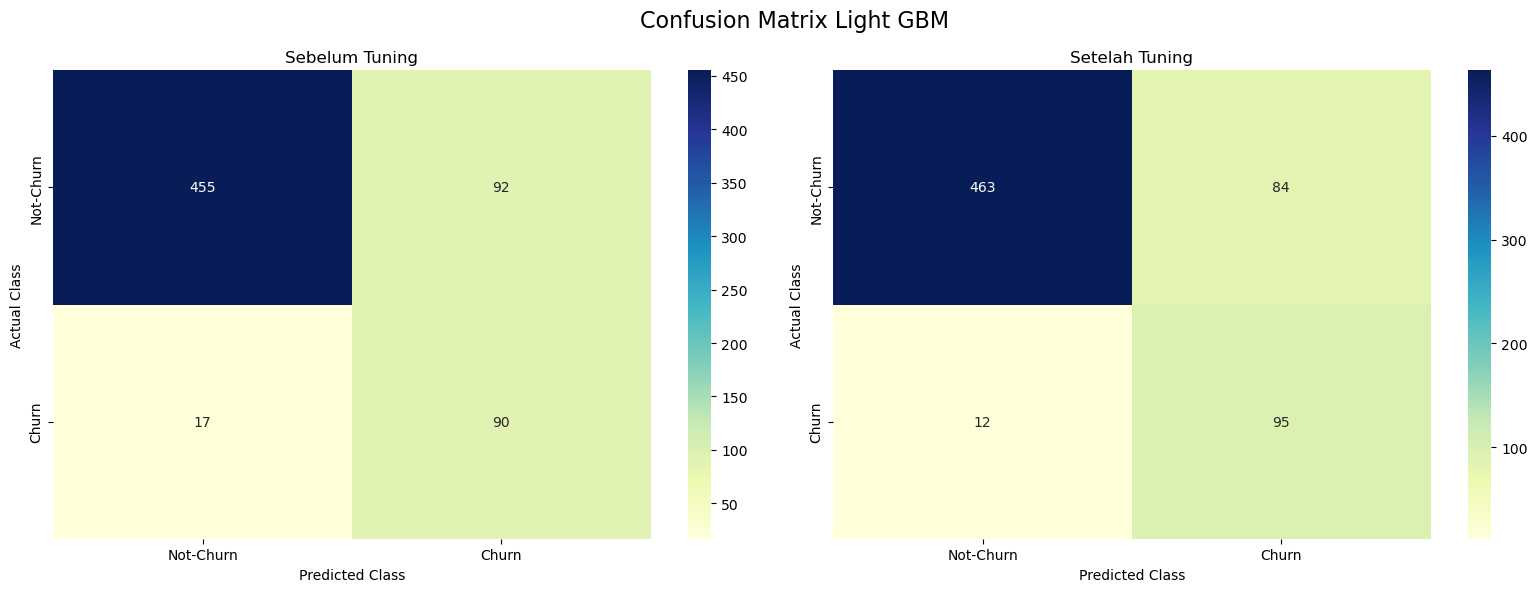

In [169]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Menyiapkan figure dengan ukuran tertentu
plt.figure(figsize=(16, 6))

# Subplot pertama (sebelum tuning)
plt.subplot(121)
sns.heatmap(confusion_matrix(y_test, y_pred_default_lgbm), annot=True, fmt='g', 
            xticklabels=['Not-Churn', 'Churn'], yticklabels=['Not-Churn', 'Churn'], cmap='YlGnBu')
plt.title('Sebelum Tuning')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')

# Subplot kedua (setelah tuning)
plt.subplot(122)
sns.heatmap(confusion_matrix(y_test, y_pred_lgbm_tuning), annot=True, fmt='g', 
            xticklabels=['Not-Churn', 'Churn'], yticklabels=['Not-Churn', 'Churn'], cmap='YlGnBu')
plt.title('Setelah Tuning')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')

# Menambahkan judul keseluruhan untuk figure
plt.suptitle('Confusion Matrix Light GBM', fontsize=16)

# Menampilkan plot
plt.tight_layout()
plt.show()

----

# EXPLAINABLE MACHINE LEARNING

### **Save Model**

In [173]:
import pickle

In [175]:
# Model Akhir
best_model = grid_lgb.best_estimator_
# Simpan model yang sudah di-tuning
pickle.dump(best_model, open('finalmodel_lgbm.sav', 'wb'))

### **Feature Importance & Shapley Value of Explanations (SHAP)**

[LightGBM] [Info] Number of positive: 427, number of negative: 2189
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000369 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 393
[LightGBM] [Info] Number of data points in the train set: 2616, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.163226 -> initscore=-1.634416
[LightGBM] [Info] Start training from score -1.634416


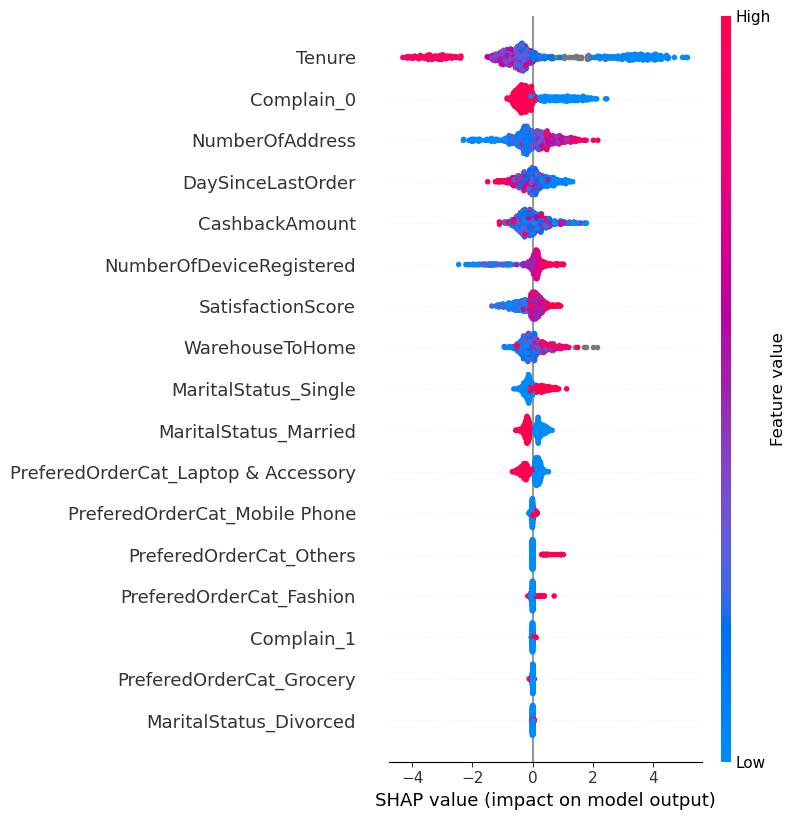

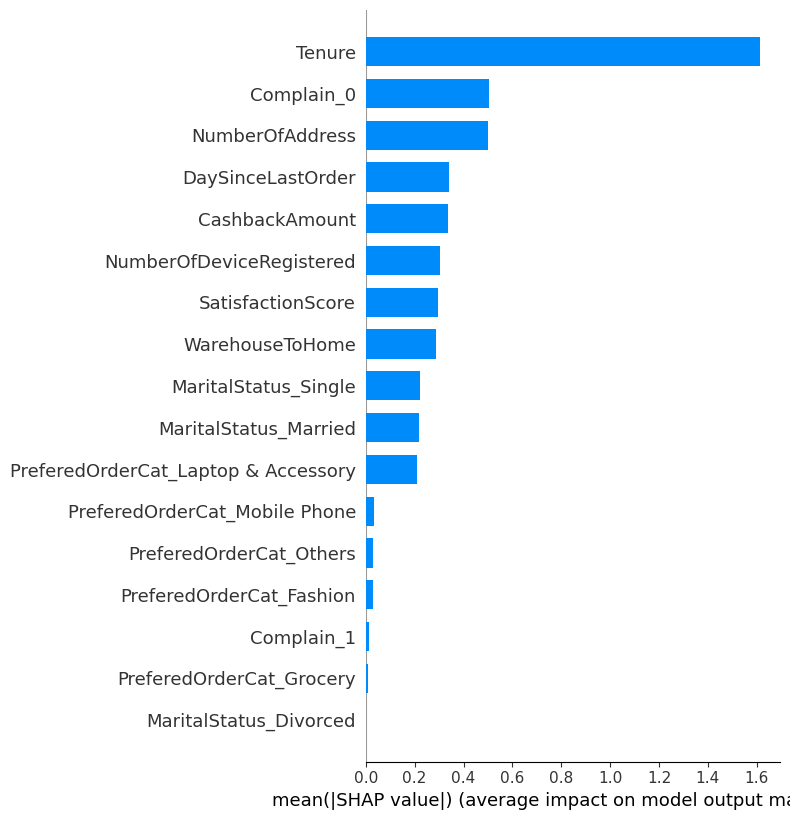

In [181]:
import shap
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from lightgbm import LGBMClassifier

# 🔹 Example Data (Replace with Your Data)
# X_train, X_test should be preloaded
# y_train should be preloaded

# 🔹 Define Column Transformer
numeric_features = ['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered', 
                    'SatisfactionScore', 'NumberOfAddress', 'DaySinceLastOrder', 'CashbackAmount']
categorical_features = ['PreferedOrderCat', 'MaritalStatus', 'Complain']

preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

# 🔹 Define Model in Pipeline
lgbm_best_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LGBMClassifier(n_estimators=100, random_state=42))
])

# 🔹 Train Model
lgbm_best_model.fit(X_train, y_train)

# 🔹 Extract Model & Preprocessor
model = lgbm_best_model.named_steps['model']
preprocessor = lgbm_best_model.named_steps['preprocessor']

# 🔹 Transform X_train and X_test
X_train_transformed = preprocessor.transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# 🔹 Get Transformed Feature Names
def get_feature_names(preprocessor, input_features):
    """Extracts feature names from preprocessor pipeline."""
    feature_names = []
    
    for name, transformer, columns in preprocessor.transformers_:
        if hasattr(transformer, "get_feature_names_out"):
            transformed_features = transformer.get_feature_names_out(columns)
            feature_names.extend(transformed_features)
        else:
            feature_names.extend(columns)
    
    return feature_names

feature_names = get_feature_names(preprocessor, X_train.columns)

# 🔹 Initialize SHAP Explainer
explainer = shap.Explainer(model, X_train_transformed)

# 🔹 Compute SHAP Values (Disable Additivity Check)
shap_values = explainer(X_test_transformed, check_additivity=False)

# 🔹 Summary Plot (Global Feature Importance)
shap.summary_plot(shap_values, features=X_test_transformed, feature_names=feature_names)

# 🔹 Bar Plot (Mean Absolute SHAP Values)
shap.summary_plot(shap_values, features=X_test_transformed, feature_names=feature_names, plot_type="bar")

### **3 Fitur Paling Penting**:
Faktor yang mempengaruhi Customer Churn berdasarkan Feature Importance dan SHAP , 3 Faktor utama yang mempengaruhi prediksi Customer Churn secara berurutan adalah :  

1. **Tenure (Lama berlangganan)**  
   - Pelanggan dengan tenure yang lebih pendek (baru berlangganan) memiliki kemungkinan churn lebih tinggi.  
   - Pelanggan dengan tenure yang lebih lama cenderung lebih loyal terhadap layanan perusahaan).  

2. **Complain (Keluhan pelanggan)**  
   - Semakin banyak keluhan yang diajukan pelanggan, semakin besar kemungkinan mereka untuk churn.  
   - Nilai complain yang tinggi menunjukkan ketidakpuasan terhadap layanan.  
   - Pelanggan yang tidak pernah mengajukan keluhan lebih cenderung bertahan.  

3. **Number of Address (Jumlah alamat yang terdaftar)**  
   - Semakin banyak alamat yang didaftarkan, semakin besar kemungkinan pelanggan churn.  
   - Banyaknya alamat yang terdaftar bisa mengindikasikan bahwa pelanggan sering berpindah lokasi, yang mungkin menyebabkan mereka mencari layanan lain yang ling berpindah alamat. alamat.

----

# CONCLUSION AND RECOMMENDATION

### **Conclusion**

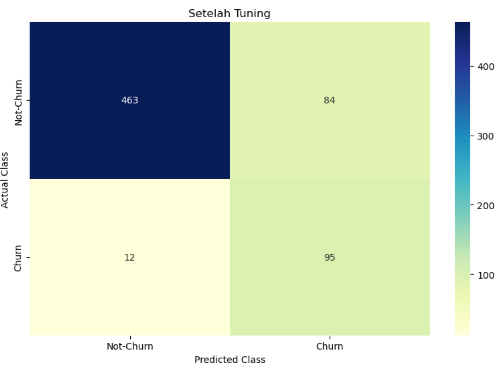

- **True Negative (TN)**: 463
- **False Positive (FP)**: 84
- **False Negative (FN)**: 12
- **True Positive (TP)**: 95

**1. Menghitung Biaya yang Tidak Tepat Sasaran (FP)**:

Biaya per **False Positive** memberikan promosi kepada pelanggan yang tidak churn adalah **$150 per capita** (https://beprofit.co/a/blog/the-customer-acquisition-cost-in-e-commerce-and-industry)

- Biaya FP = 84 X 150 = 12,600 

**2. Menghitung Kerugian dari False Negative (FN)**:

Biaya per **False Negative** tidak memberi perhatian pada pelanggan yang churn akan mengakibatkan kerugian mencapai 5x lipat daripada biaya promosi adalah **$750  per capita** (https://www.forrester.com/what-it-means/ep04-rethinking-customer-loyalty/).

- Biaya FN = 12 x 750 = 9,000 

**3. Menghitung Total Kerugian**:

Total kerugian yang dialami perusahaan adalah penjumlahan dari **False Positive** dan **False Negative**.
Total Kerugian = Biaya FP + Biaya FN = 12,600 + 9,000 = 21,600 

**4. Menghitung Biaya Promosi yang Tepat Sasaran**:

Biaya untuk pelanggan yang benar-benar churn (TP + FN):
Biaya Tepat Sasaran = (TP + FN) x 150 = (95 + 12) x 150 = 107 x 150 = 16,050 

**5. Menghitung Total Pengeluaran untuk Promosi**:

Pengeluaran total perusahaan adalah biaya promosi untuk **semua pelanggan** yang diprediksi:
Pengeluaran Total = (TP + FP + TN + FN) x 150 = (95 + 84 + 463 + 12) x 150 = 654 x 150 = 98,100 

**6. Menurunkan Biaya Setelah Menggunakan Machine Learning**:
- **Biaya yang Tidak Tepat Sasaran**: USD 12,600 (False Positive)
- **Kerugian dari False Negative**: USD 9,000 (False Negative)
- **Total Kerugian Setelah Machine Learning**: USD 21,600

**7. Membandingkan dengan Biaya Sebelum Machine Learning**:
- **Biaya yang Tidak Tepat Sasaran** = 98,100−16,050 = 82,040
- **Kerugian Tanpa Machine Learning**: USD 82,040 (biaya promosi yang tidak tepat sasaran)
- **Pengurangan Kerugian**:

Pengurangan Kerugian = 82,040 - 21,600 / 82,040 = 73.67 %

### **Kesimpulan:**
Dengan menggunakan **Machine Learning Light GBM**  untuk memprediksi churn, perusahaan dapat mengurangi **kerugian biaya promosi yang tidak tepat sasaran** sebesar **73.67 %**. Meskipun ada sedikit biaya terkait dengan **False Positives** dan **False Negatives**, perusahaan dapat **menghemat biaya besar** yang sebelumnya dihabiskan untuk promosi yang tidak efektif.

### **Recommendation**

**`Rekomendasi untuk Bisnis`** 

**1️. Tingkatkan Pengalaman Pelanggan Baru**  
- Buat program onboarding yang jelas agar pelanggan cepat memahami manfaat layanan.  
- Berikan promo khusus seperti diskon atau cashback untuk pelanggan baru.  
- Sediakan customer support yang responsif agar pelanggan merasa didampingi.  

**2️. Percepat Penanganan Keluhan Pelanggan**  
- Gunakan chatbot atau layanan 24/7 untuk merespons keluhan lebih cepat.  
- Berikan kompensasi seperti diskon bagi pelanggan yang mengalami masalah serius.  
- Analisis keluhan pelanggan untuk memperbaiki layanan secara proaktif.  

**3️. Tawarkan Solusi Fleksibel untuk Pelanggan dengan Banyak Alamat**  
- Berikan opsi pengiriman yang lebih fleksibel, seperti pickup point atau pengiriman ke kantor.  
- Gunakan promosi berbasis lokasi agar pelanggan tetap tertarik dengan layanan.  

**`Rekomendasi untuk Model`**

**1️. Meningkatkan Jumlah Data:** Cobalah untuk mendapatkan lebih banyak data untuk kelas minoritas agar model lebih seimbang dan akurat.

**2️. Evaluasi Penggunaan RandomUnderSampler (RUS):** Pertimbangkan untuk mencoba SMOTE sebagai alternatif untuk menghindari kehilangan informasi penting dari data mayoritas.

**3️. Optimasi Hyperparameter:** Lakukan tuning hyperparameter menggunakan GridSearchCV atau RandomizedSearchCV untuk menemukan kombinasi terbaik pada Random Forest dan LightGBM.

**4️. Threshold Optimasi untuk F2 Score:** Sesuaikan threshold prediksi untuk F2 Score agar lebih optimal dalam menangani ketidakseimbangan kelas.

**5️. Feature Engineering:** Lakukan feature selection untuk memilih fitur yang paling relevan dan pertimbangkan untuk membuat fitur baru yang lebih representatif.

**6️. Menambahkan Fitur:** Tambahan Memperkenalkan variabel baru, seperti waktu dan akurasi pengiriman serta pola perilaku belanja, yang dapat memperkaya model dan meningkatkan akurasi prediksi.

**7️. Analisis Kesalahan Prediksi:** Teliti kesalahan prediksi, terutama pada kelas minoritas, untuk memahami pola yang sulit diprediksi.dan lengkap.

# MODEL DEPLOYMENT

Untuk mempermudah perusahaan dalam memprediksi kemungkinan churn (berhentinya pelanggan) atau tidak, akan dikembangkan sebuah aplikasi berbasis web (WebApp) yang memungkinkan perusahaan untuk dengan mudah memasukkan data pelanggan sesuai dengan kriteria yang telah ditentukan. Aplikasi ini dirancang untuk memungkinkan perusahaan melakukan analisis prediktif secara langsung, tanpa memerlukan keterampilan teknis yang mendalam. Cukup dengan memasukkan informasi terkait pelanggan, seperti demografi, perilaku pembelian, interaksi layanan, dan data historis lainnya, perusahaan dapat dengan cepat mengetahui apakah seorang pelanggan berisiko untuk churn. Dengan sistem yang mudah dioperasikan dan antarmuka yang intuitif, perusahaan dapat memanfaatkan informasi ini untuk mengambil tindakan preventif yang lebih efektif dan meningkatkan retensi pelanggan.

**Link WebApp** : https://pengumpulancapston3-tlcdcrvmlfj3wdtmmgamtx.streamlit.app/

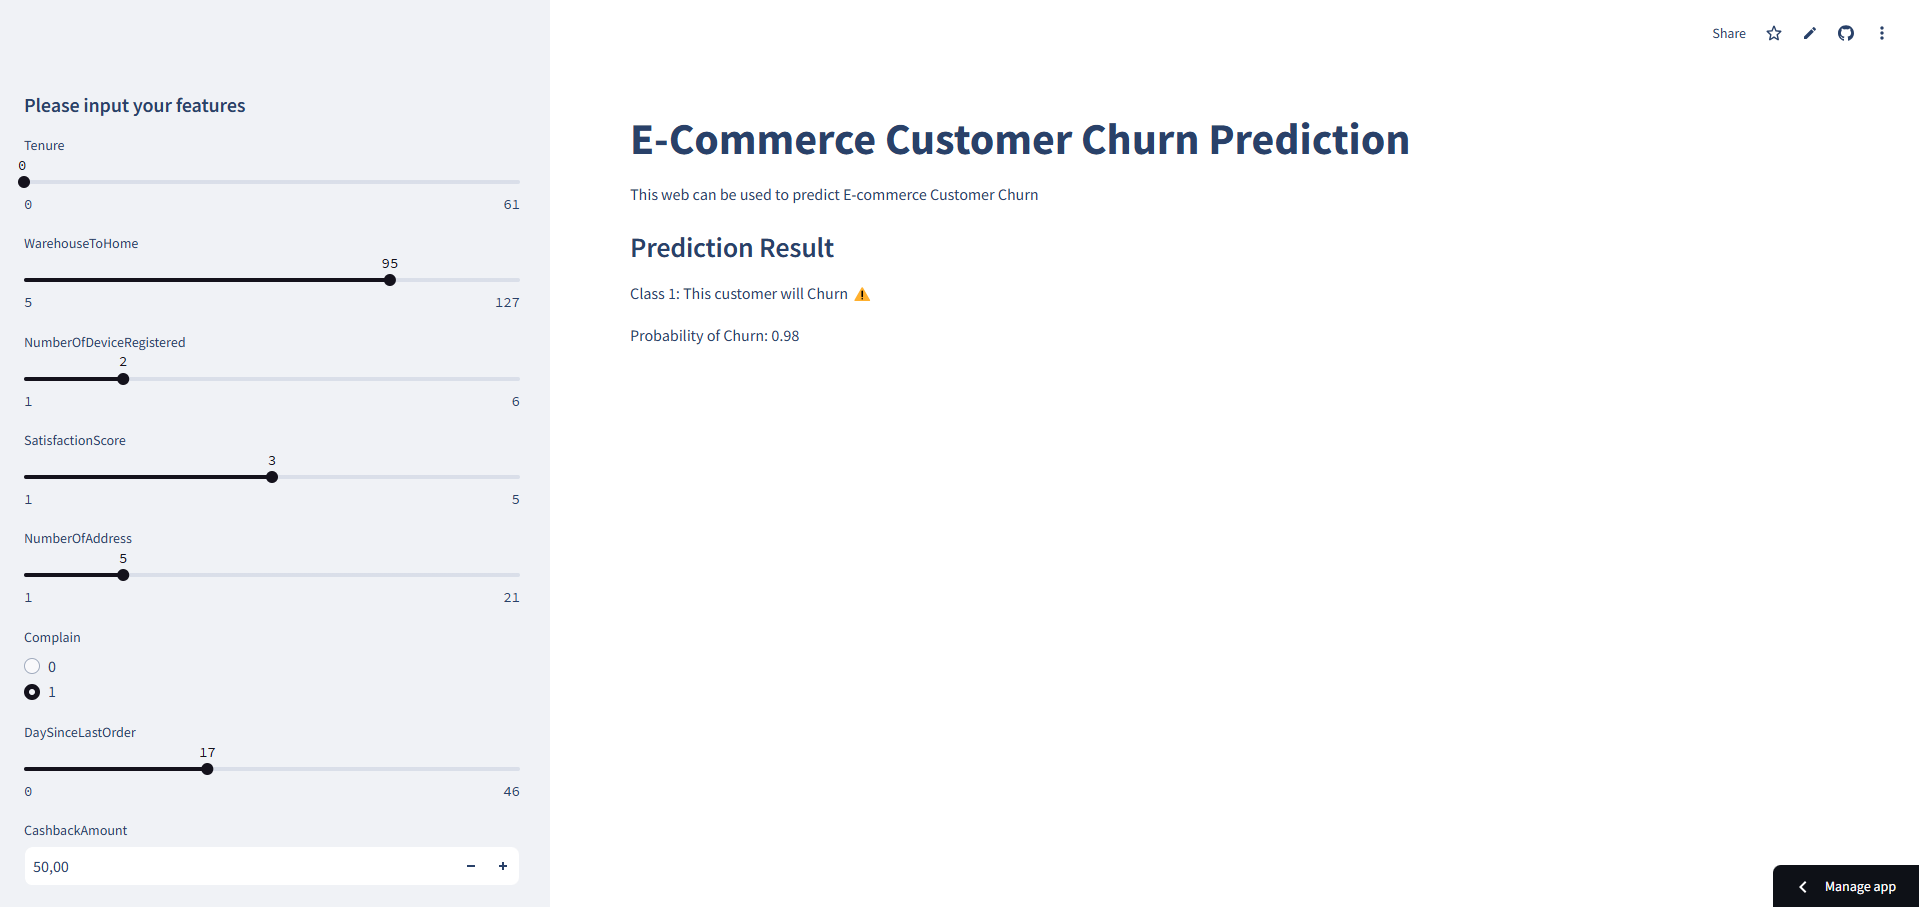

Contoh prediksi yang dilakukan pada WebApp yang terlihat pada gambar di atas menggambarkan bagaimana sistem dapat menganalisis data pelanggan untuk memprediksi kemungkinan churn. 